In [275]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm 
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [276]:
df=pd.read_csv('masked_kiva_loans.csv')
df.head(n=10)

,id,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date
0,1242201,500,500,Agriculture,Pakistan,245.0,14,14,female,monthly,2/20/2017
1,1165778,325,325,Agriculture,Philippines,145.0,14,13,female,irregular,10/11/2016
2,1123052,800,800,Agriculture,Ecuador,159.0,14,29,female,bullet,7/25/2016
3,1312344,425,425,Agriculture,Philippines,136.0,8,1,female,irregular,6/2/2017
4,861422,275,275,Agriculture,Kenya,133.0,12,11,female,monthly,3/25/2015
5,864504,350,350,Agriculture,Pakistan,245.0,14,14,female,monthly,3/31/2015
6,1023952,200,200,Agriculture,Philippines,145.0,7,8,female,irregular,2/17/2016
7,690323,575,575,Agriculture,Georgia,181.0,15,20,female,monthly,3/28/2014
8,749263,325,325,Agriculture,Nigeria,288.0,17,13,female,bullet,8/4/2014
9,928716,500,500,Agriculture,Kenya,156.0,16,10,female,monthly,8/6/2015


In [277]:
df.tail(n=10)

,id,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date
33551,1279042,1675,1675,Wholesale,Uganda,222.0,7,59,"male, male, male, male, male, male, female, ma...",monthly,4/13/2017
33552,1031585,3975,3975,Wholesale,Uganda,290.0,19,156,male,monthly,3/1/2016
33553,874207,250,250,Wholesale,Philippines,126.0,8,5,female,irregular,4/23/2015
33554,847852,100,100,Wholesale,Philippines,126.0,8,4,female,irregular,2/27/2015
33555,1178300,350,350,Wholesale,Pakistan,247.0,14,12,female,monthly,11/1/2016
33556,886976,500,500,Wholesale,Pakistan,247.0,14,18,female,monthly,5/18/2015
33557,1017003,300,300,Wholesale,Pakistan,247.0,12,12,female,irregular,2/2/2016
33558,831649,225,225,Wholesale,Pakistan,421.0,14,9,female,monthly,1/23/2015
33559,920920,2000,2000,Wholesale,Palestine,80.0,27,54,male,monthly,7/21/2015
33560,931675,750,750,Wholesale,Pakistan,247.0,12,27,"female, female",irregular,8/13/2015


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33561 entries, 0 to 33560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  33561 non-null  int64  
 1   funded_amount       33561 non-null  int64  
 2   loan_amount         33561 non-null  int64  
 3   sector              33561 non-null  object 
 4   country             33561 non-null  object 
 5   partner_id          32927 non-null  float64
 6   term_in_months      33561 non-null  int64  
 7   lender_count        33561 non-null  int64  
 8   borrower_genders    33366 non-null  object 
 9   repayment_interval  33561 non-null  object 
 10  date                33561 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.8+ MB


In [279]:
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,3.356100e+04,33561.000000,33561.000000,32927.000000,33561.000000,33561.000000
mean,9.931834e+05,789.871279,843.059653,177.819145,13.691428,20.549179
std,1.965757e+05,1177.245363,1222.188679,93.838691,8.566574,28.514324
min,6.530490e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.217790e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.945450e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.164156e+06,900.000000,975.000000,204.000000,14.000000,24.000000
max,1.340239e+06,50000.000000,50000.000000,533.000000,145.000000,1481.000000


In [280]:
print(df['borrower_genders'].value_counts())
print(df['repayment_interval'].value_counts())
print(df['sector'].value_counts())

borrower_genders
female                                                                                                                                                                                                              21264
male                                                                                                                                                                                                                 6784
female, female                                                                                                                                                                                                        602
female, female, female                                                                                                                                                                                                584
female, female, female, female                                                                                 

In [281]:
df.drop(columns=['borrower_genders','partner_id'],inplace=True)

In [282]:
df.dropna(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33561 entries, 0 to 33560
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  33561 non-null  int64 
 1   funded_amount       33561 non-null  int64 
 2   loan_amount         33561 non-null  int64 
 3   sector              33561 non-null  object
 4   country             33561 non-null  object
 5   term_in_months      33561 non-null  int64 
 6   lender_count        33561 non-null  int64 
 7   repayment_interval  33561 non-null  object
 8   date                33561 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.3+ MB


In [283]:
df.drop_duplicates(inplace=True)
df.reset_index()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33561 entries, 0 to 33560
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  33561 non-null  int64 
 1   funded_amount       33561 non-null  int64 
 2   loan_amount         33561 non-null  int64 
 3   sector              33561 non-null  object
 4   country             33561 non-null  object
 5   term_in_months      33561 non-null  int64 
 6   lender_count        33561 non-null  int64 
 7   repayment_interval  33561 non-null  object
 8   date                33561 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.3+ MB


In [284]:
df.drop(columns='id',inplace=True)
df.head()




,funded_amount,loan_amount,sector,country,term_in_months,lender_count,repayment_interval,date
0,500,500,Agriculture,Pakistan,14,14,monthly,2/20/2017
1,325,325,Agriculture,Philippines,14,13,irregular,10/11/2016
2,800,800,Agriculture,Ecuador,14,29,bullet,7/25/2016
3,425,425,Agriculture,Philippines,8,1,irregular,6/2/2017
4,275,275,Agriculture,Kenya,12,11,monthly,3/25/2015


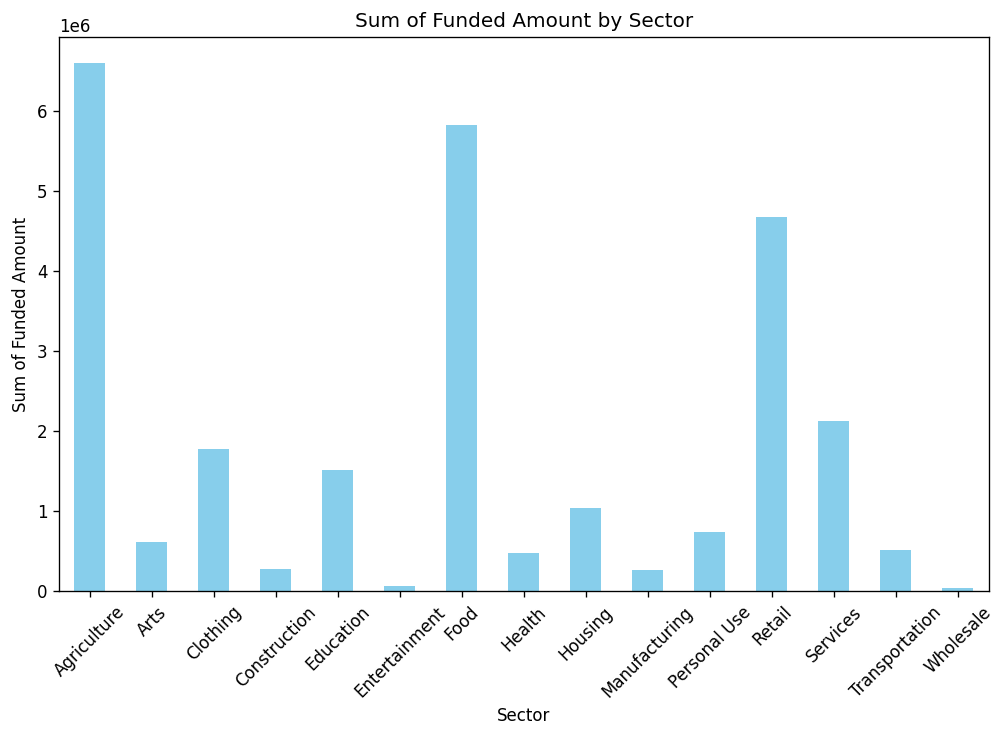

In [285]:


# Group by 'sector' and sum 'funded_amount'
sector_funding = df.groupby('sector')['funded_amount'].sum()

# Plotting
plt.figure(figsize=(10, 6))
sector_funding.plot(kind='bar', color='skyblue')
plt.title('Sum of Funded Amount by Sector')
plt.xlabel('Sector')
plt.ylabel('Sum of Funded Amount')
plt.xticks(rotation=45)
plt.show()


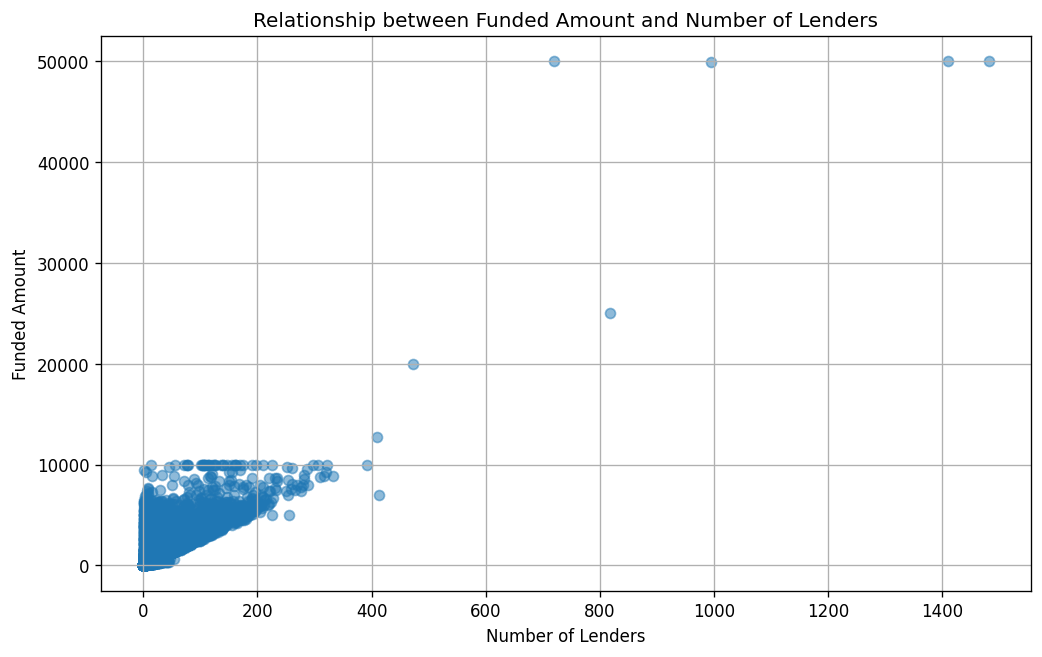

In [286]:


plt.figure(figsize=(10, 6))
plt.scatter(df['lender_count'], df['funded_amount'], alpha=0.5)
plt.title('Relationship between Funded Amount and Number of Lenders')
plt.xlabel('Number of Lenders')
plt.ylabel('Funded Amount')
plt.grid(True)
plt.show()


In [287]:
df.to_csv("cleaned_data.csv")

In [288]:



# Initialize label encoders
label_encoders = {
    'sector': LabelEncoder(),
    'country': LabelEncoder(),
    'repayment_interval': LabelEncoder()
}
for column, encoder in label_encoders.items():
    df[column] = encoder.fit_transform(df[column])
df.head()


,funded_amount,loan_amount,sector,country,term_in_months,lender_count,repayment_interval,date
0,500,500,0,48,14,14,2,2/20/2017
1,325,325,0,53,14,13,1,10/11/2016
2,800,800,0,17,14,29,0,7/25/2016
3,425,425,0,53,8,1,1,6/2/2017
4,275,275,0,30,12,11,2,3/25/2015


In [289]:
maindf=df.copy()
df['date'] = pd.to_datetime(df['date'])
maindf=df.copy()
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(columns='date', inplace=True)
df.reset_index ()
df.head()

,funded_amount,loan_amount,sector,country,term_in_months,lender_count,repayment_interval,year,month,day
0,500,500,0,48,14,14,2,2017,2,20
1,325,325,0,53,14,13,1,2016,10,11
2,800,800,0,17,14,29,0,2016,7,25
3,425,425,0,53,8,1,1,2017,6,2
4,275,275,0,30,12,11,2,2015,3,25


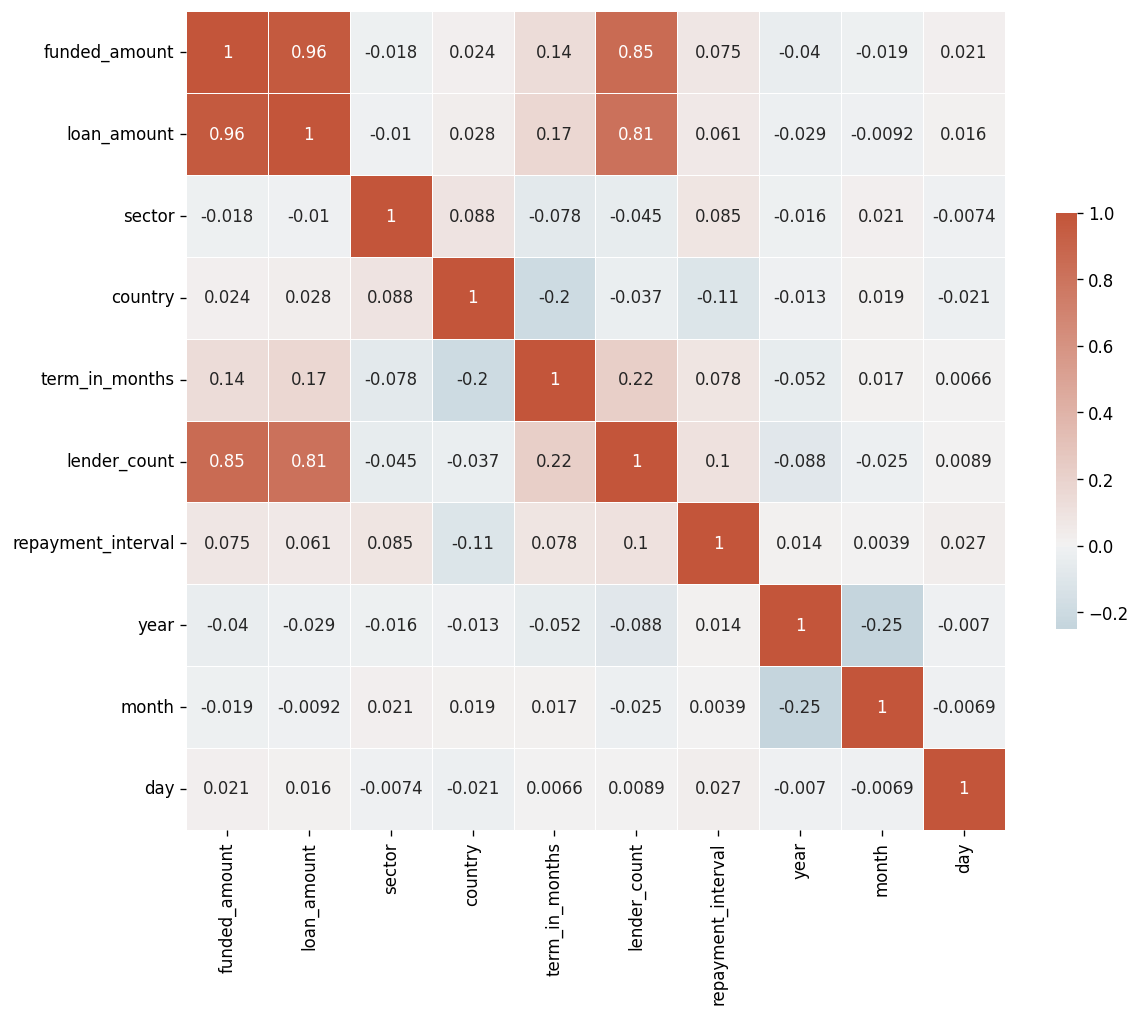

In [290]:

corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [482]:

# Selecting features and target
X = df.drop(columns=['funded_amount'])
y = df['funded_amount']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 80281.49599005692
R^2 Score: 0.9294818398373976


In [293]:

maindf['date'] = pd.to_datetime(maindf['date'])

maindf.set_index('date', inplace=True)
maindf.sort_index(inplace=True)



In [294]:
monthly_funded_amount = maindf['funded_amount'].resample('ME').sum()
monthly_funded_amount=monthly_funded_amount[:-2]
Q1 = monthly_funded_amount.quantile(0.25)
Q3 = monthly_funded_amount.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (3 * IQR)
upper_bound = Q3 + (3 * IQR)
without_outliers=monthly_funded_amount[(monthly_funded_amount >= lower_bound) & (monthly_funded_amount <= upper_bound)]
without_outliers.mean()
monthly_funded_amount = monthly_funded_amount.mask((monthly_funded_amount < lower_bound) | (monthly_funded_amount > upper_bound), without_outliers.mean())



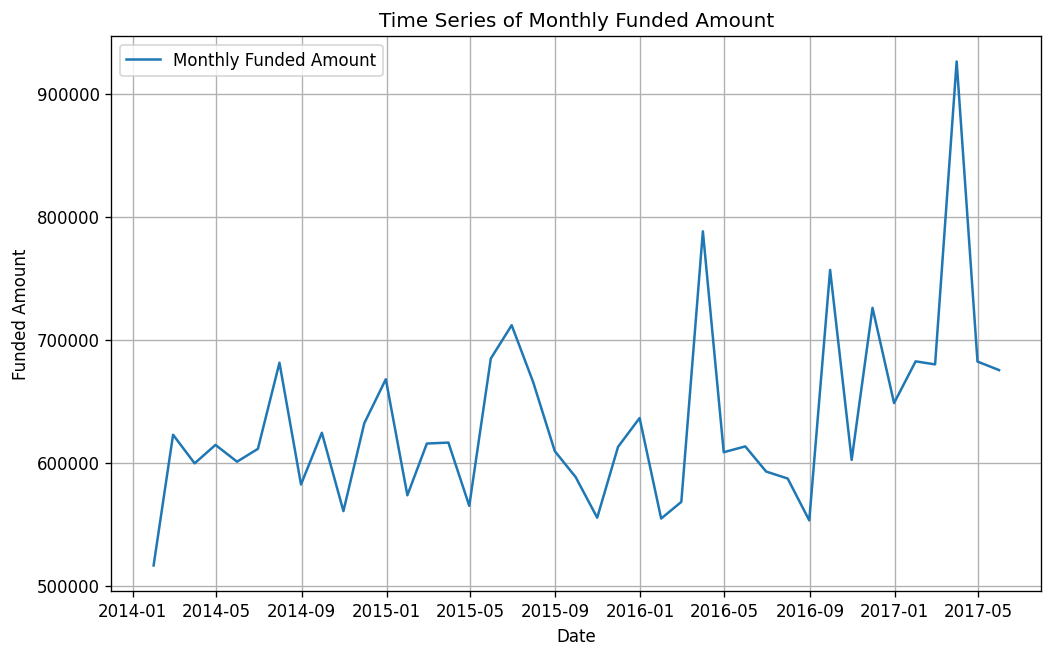

In [295]:

plt.figure(figsize=(10, 6))
plt.plot(monthly_funded_amount, label='Monthly Funded Amount')
plt.title('Time Series of Monthly Funded Amount')
plt.xlabel('Date')
plt.ylabel('Funded Amount')
plt.legend()
plt.grid(True)
plt.show()

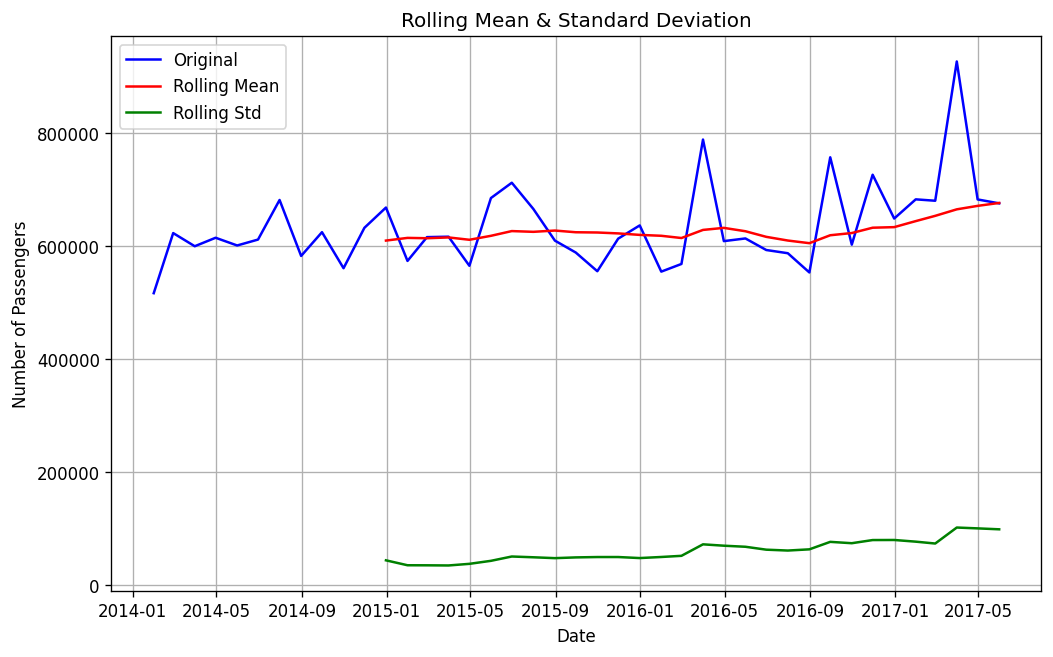

ADF Statistic: -0.5560615837615969
p-value: 0.8806044897454889
Critical Values:
	1%: -3.639224104416853
	5%: -2.9512301791166293
	10%: -2.614446989619377


In [296]:

def stationarize_series(series):
    # Calculate rolling statistics
    rolling_mean = series.rolling(window=12).mean()
    rolling_std = series.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(series, label='Original', color='blue')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Number of Passengers')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Perform Dickey-Fuller test
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
stationarize_series(monthly_funded_amount)

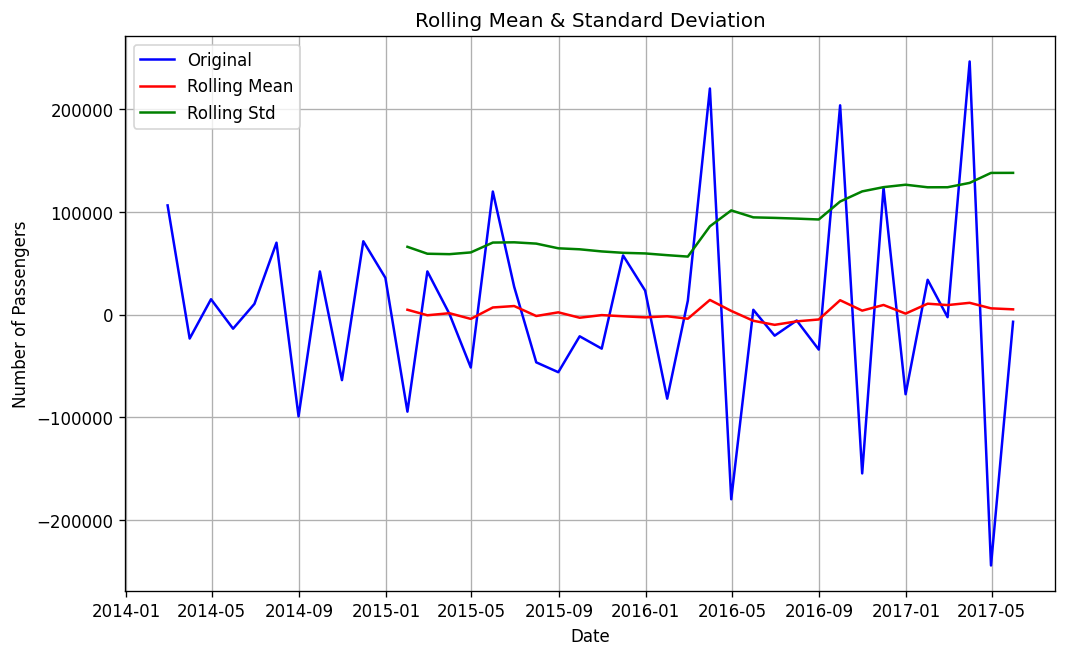

ADF Statistic: -5.411311674798199
p-value: 3.2067482991910133e-06
Critical Values:
	1%: -3.6327426647230316
	5%: -2.9485102040816327
	10%: -2.6130173469387756


In [297]:

stationarize_series(monthly_funded_amount.diff().dropna())

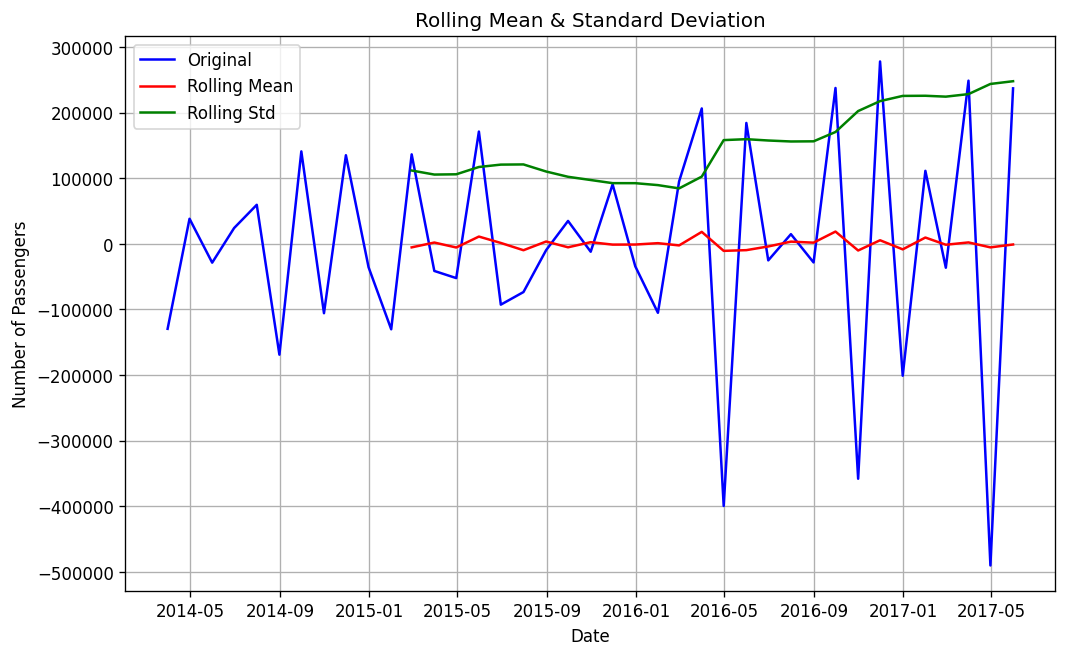

ADF Statistic: -4.142251304341009
p-value: 0.0008239750001592772
Critical Values:
	1%: -3.6889256286443146
	5%: -2.9719894897959187
	10%: -2.6252957653061224


In [298]:
stationarize_series(monthly_funded_amount.diff().diff().dropna())



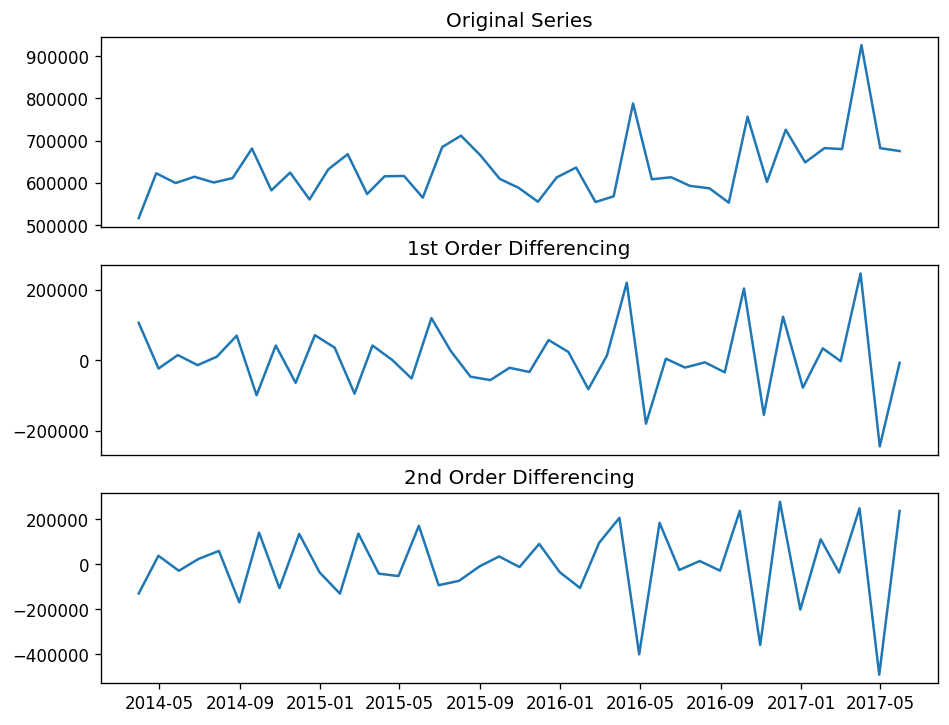

In [299]:


# Setting the figure size and resolution
plt.rcParams.update({'figure.figsize': (9, 7), 'figure.dpi': 120})

# Creating subplots for original series and differenced series
fig, (ax1, ax2, ax3) = plt.subplots(3)

# Plotting the original series
ax1.plot(monthly_funded_amount)
ax1.set_title('Original Series')
ax1.axes.xaxis.set_visible(False)

# Plotting the first order differencing
ax2.plot(monthly_funded_amount.diff())
ax2.set_title('1st Order Differencing')
ax2.axes.xaxis.set_visible(False)

# Plotting the second order differencing
ax3.plot(monthly_funded_amount.diff().diff())
ax3.set_title('2nd Order Differencing')

# Display the plots
plt.show()

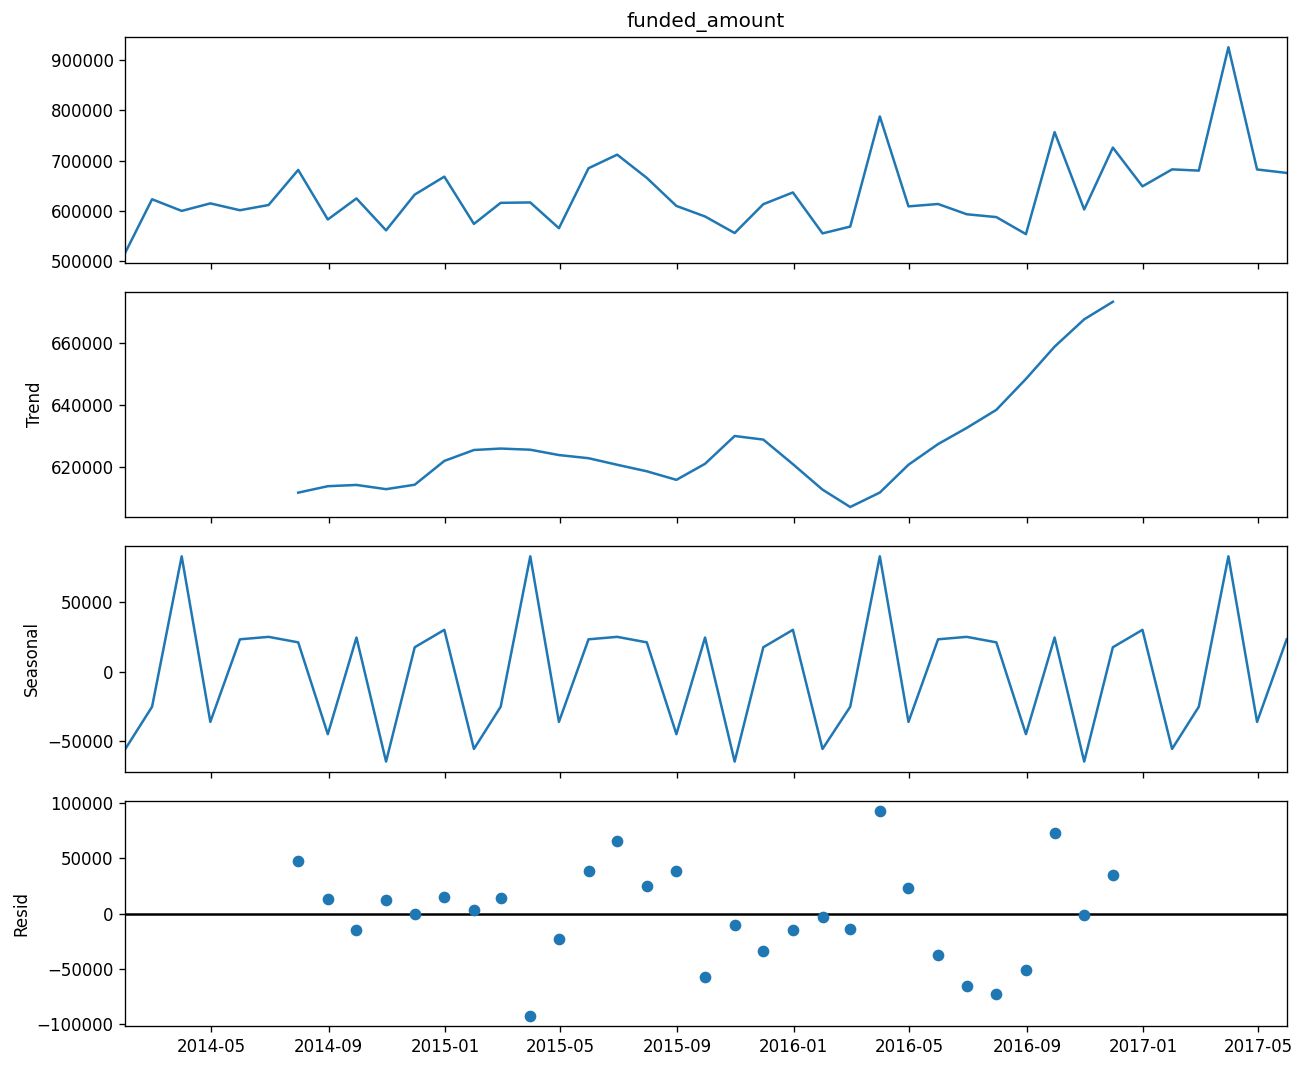

In [300]:

decomposition = sm.tsa.seasonal_decompose(monthly_funded_amount)
rcParams['figure.figsize']= 11,9

fig= decomposition.plot()
plt.show()



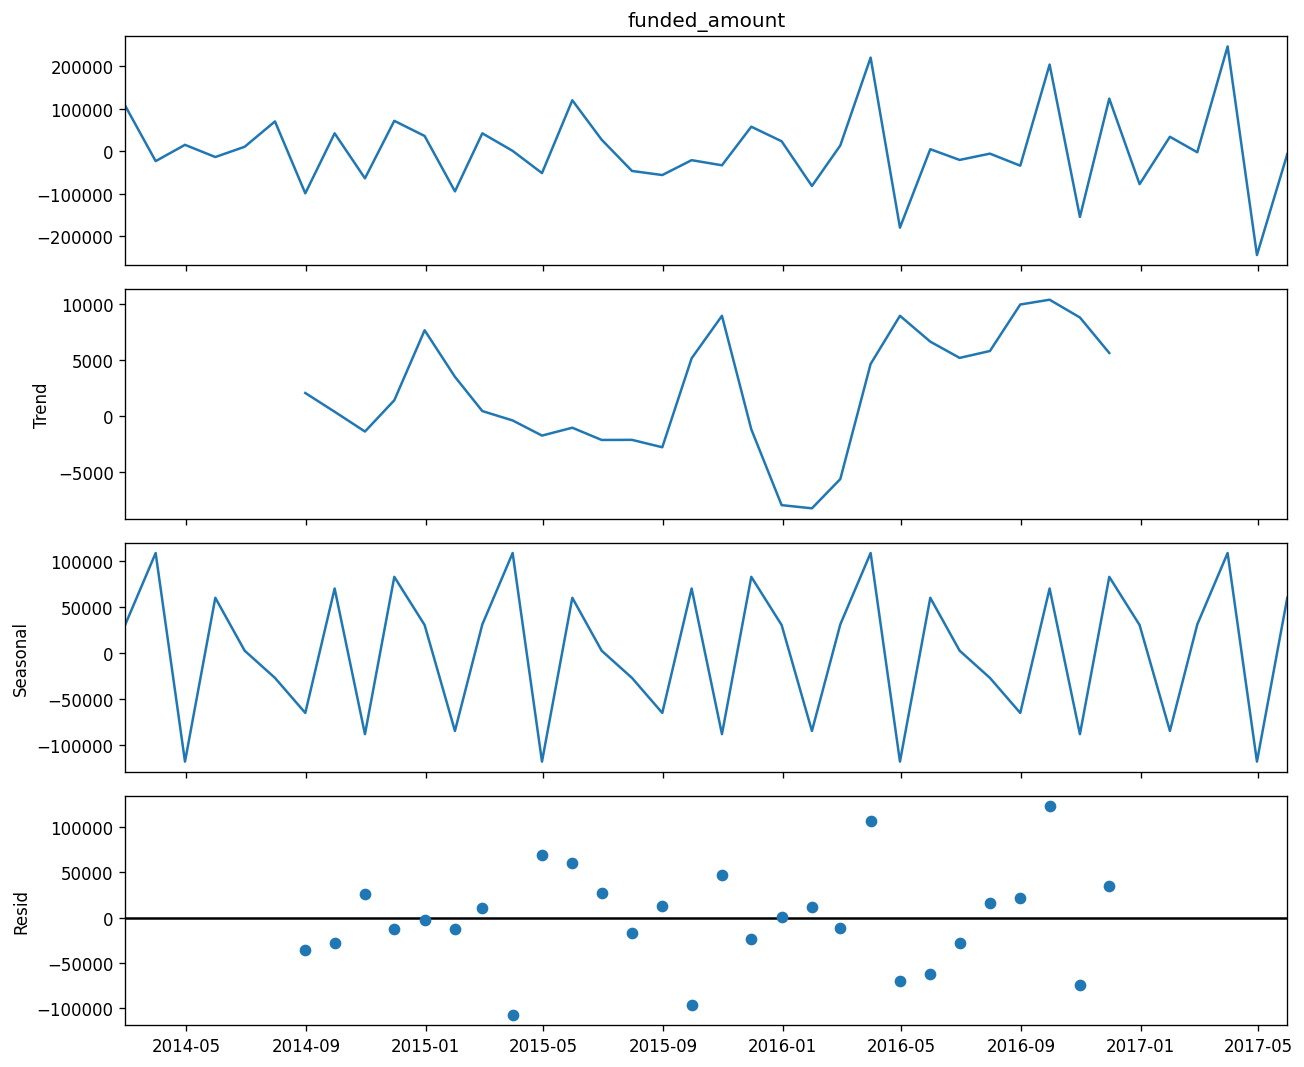

In [301]:

decomposition = sm.tsa.seasonal_decompose(monthly_funded_amount.diff().dropna())
rcParams['figure.figsize']= 11,9

fig= decomposition.plot()
plt.show()

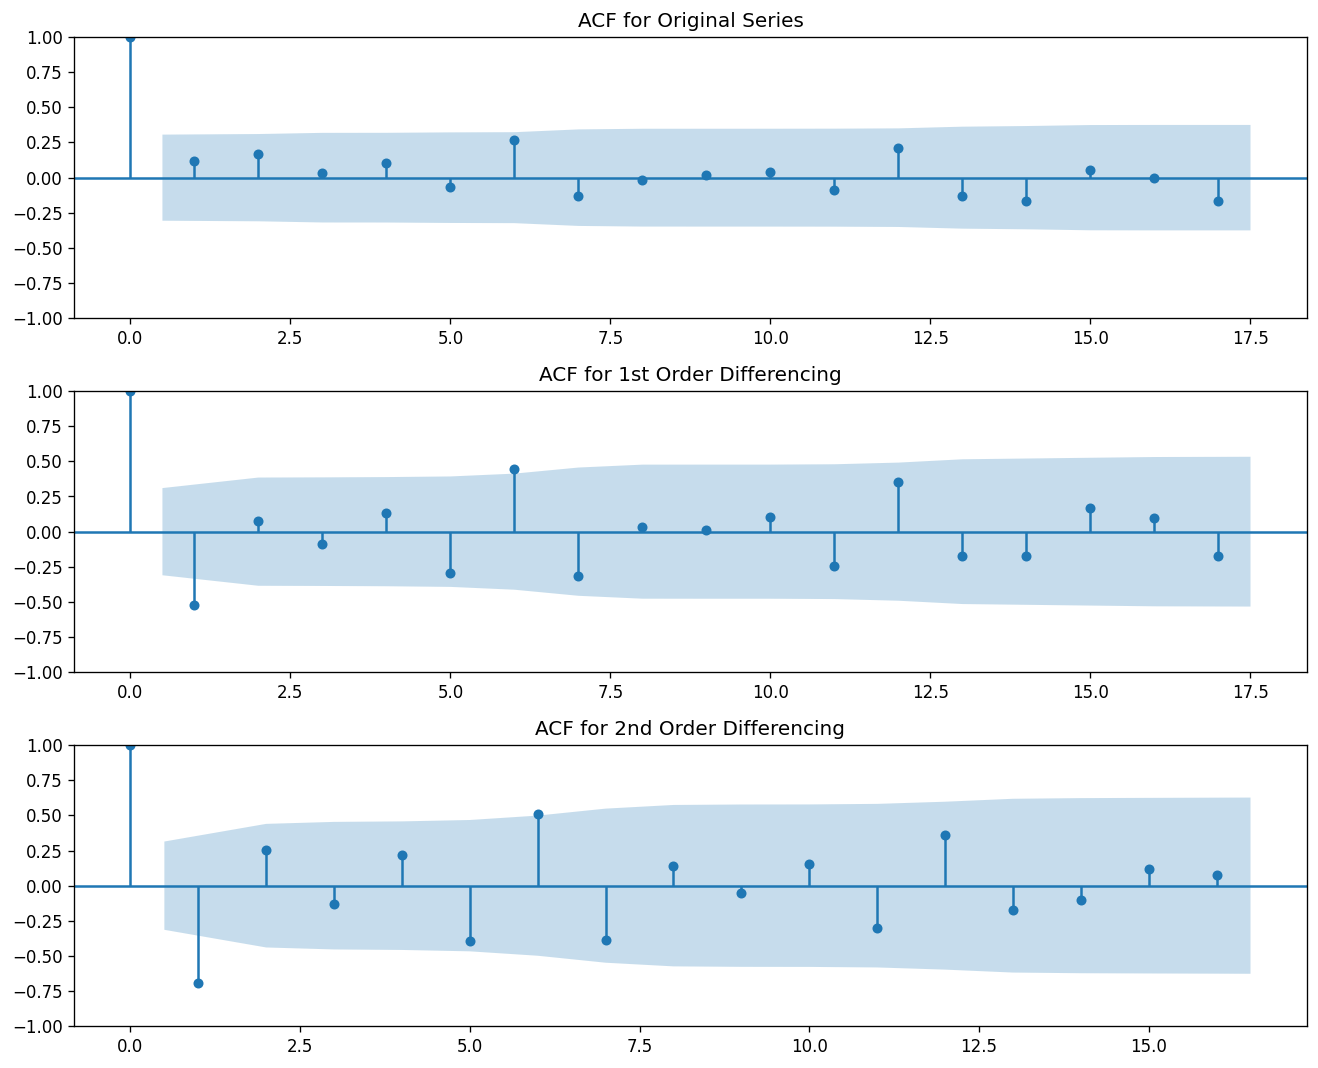

In [302]:


# Creating subplots for ACF and PACF
fig, (ax1, ax2, ax3) = plt.subplots(3)

# Plotting the Autocorrelation Function (ACF)
plot_acf(monthly_funded_amount, ax=ax1)
ax1.set_title('ACF for Original Series')

# Plotting the ACF for first order differencing
plot_acf(monthly_funded_amount.diff().dropna(), ax=ax2)
ax2.set_title('ACF for 1st Order Differencing')

# Plotting the ACF for second order differencing
plot_acf(monthly_funded_amount.diff().diff().dropna(), ax=ax3)
ax3.set_title('ACF for 2nd Order Differencing')

# Display the plots
plt.tight_layout()
plt.show()


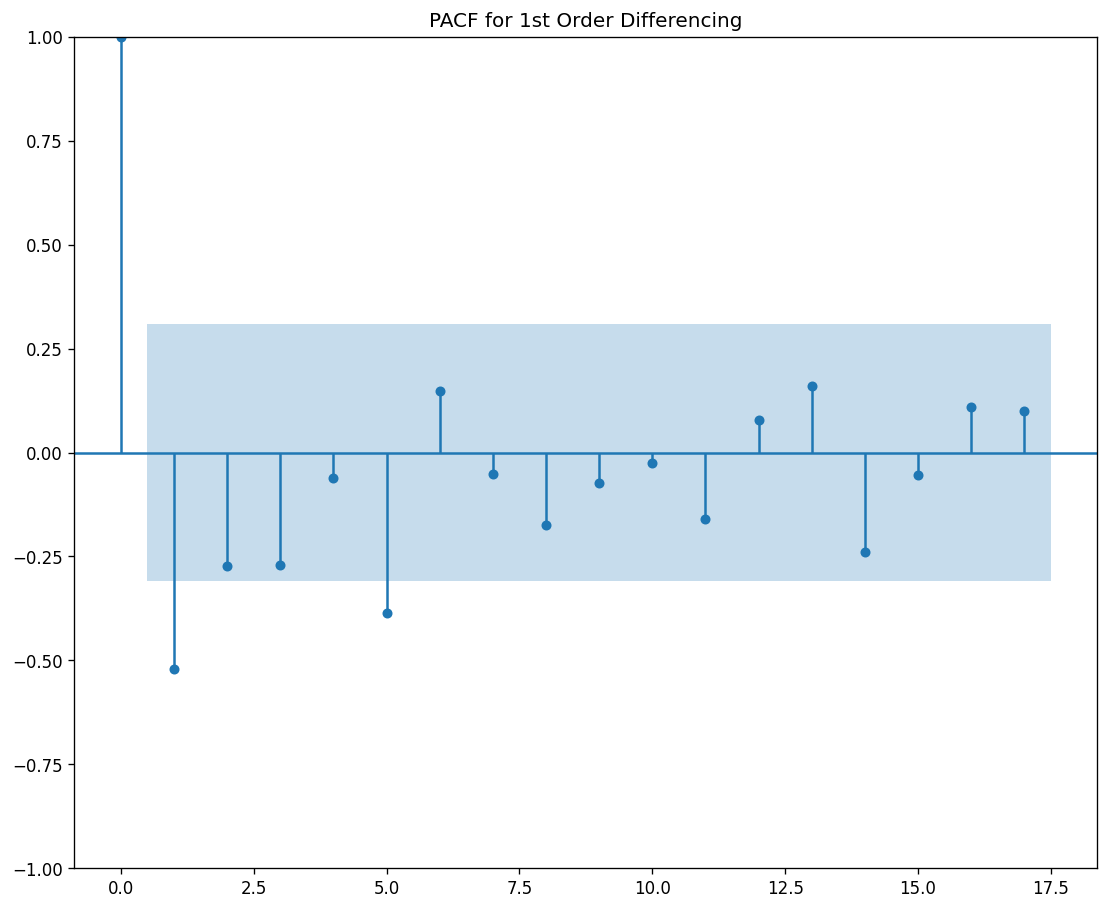

In [413]:
# Finding the value of the p parameter


# Creating a subplot for PACF
fig, ax = plt.subplots()

# Plotting the Partial Autocorrelation Function (PACF)
plot_pacf(monthly_funded_amount.diff().dropna(), ax=ax)
ax.set_title('PACF for 1st Order Differencing')

# Display the plot
plt.show()


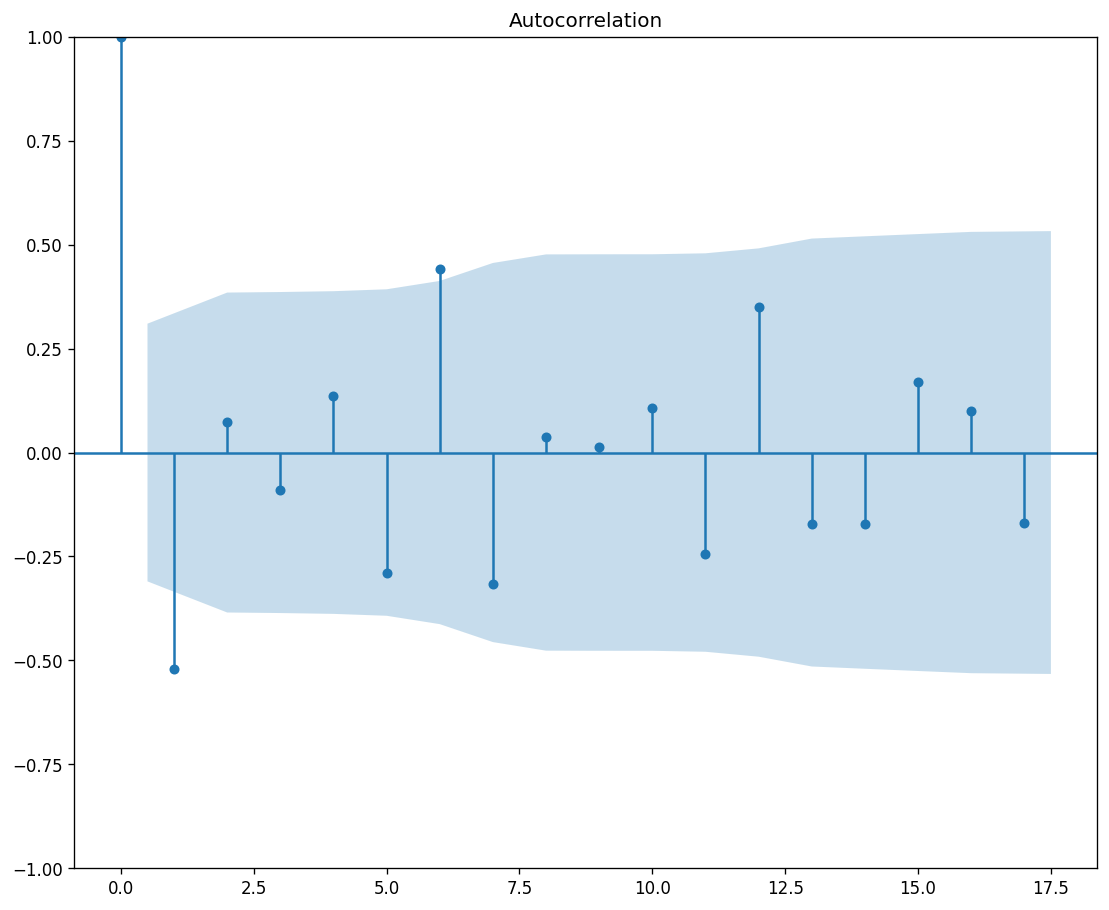

In [414]:
fig, ax = plt.subplots()  
plot_acf(monthly_funded_amount.diff().dropna(), ax=ax)  
plt.show()  




In [415]:
from pmdarima import auto_arima
model = auto_arima(monthly_funded_amount.diff().dropna(), seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1018.039, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1033.996, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1023.328, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1014.438, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1016.242, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1016.878, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1016.255, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1019.124, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.248 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -505.219
Date:                Fri, 17 May 2024   AIC                           1014.438
Time:                        21:05:3

In [306]:
train_size = int(len(monthly_funded_amount) * 0.8)
train, test = monthly_funded_amount[:train_size], monthly_funded_amount[train_size:]

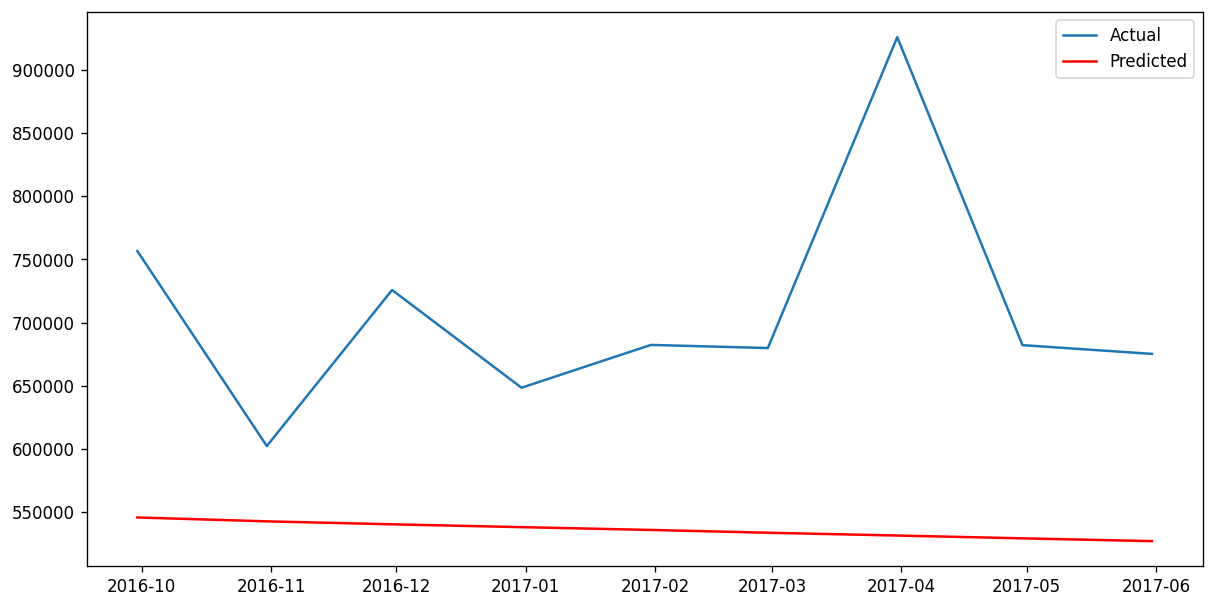

RMSE: 194010.95551581107
1       1


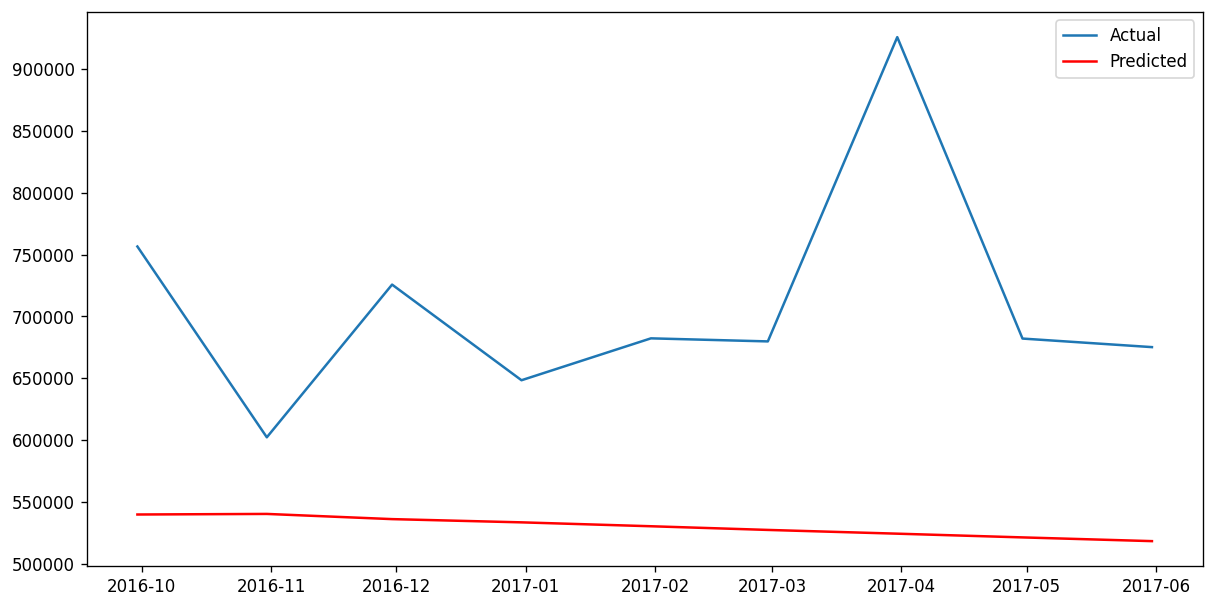

RMSE: 199585.211911305
1       2


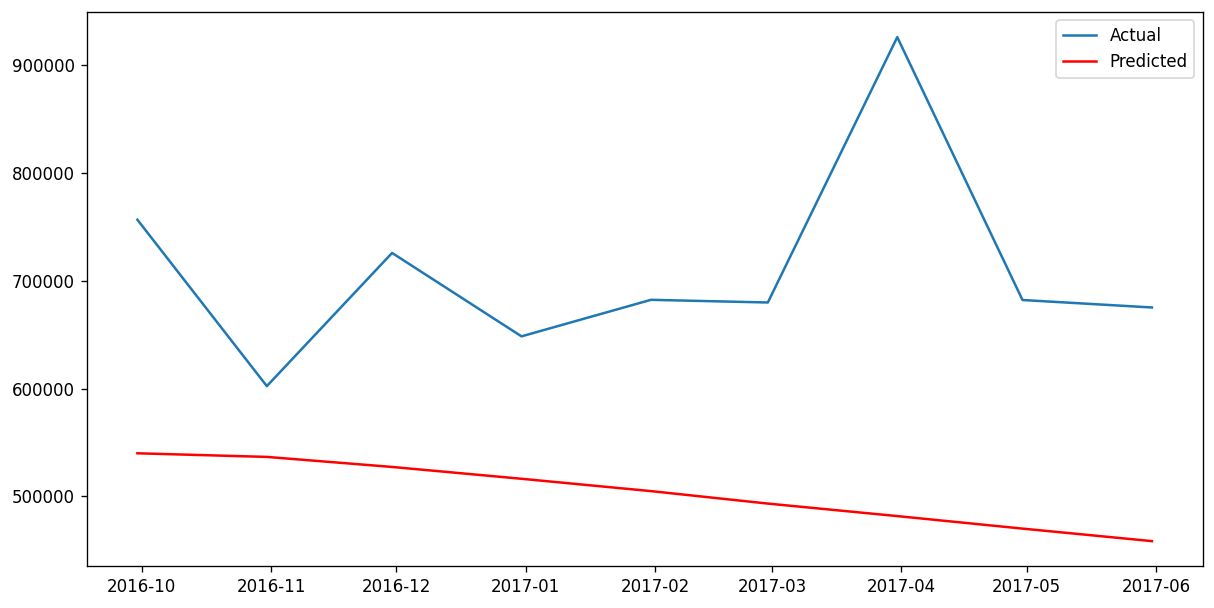

RMSE: 227060.00547220348
1       3


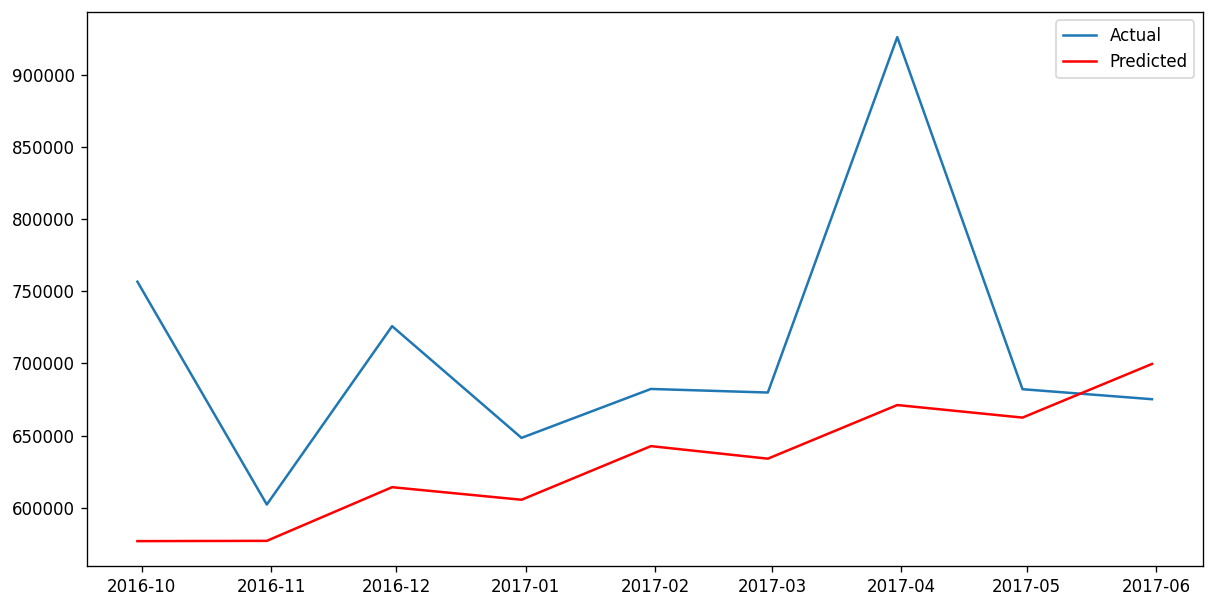

RMSE: 113949.03269153326
1       4


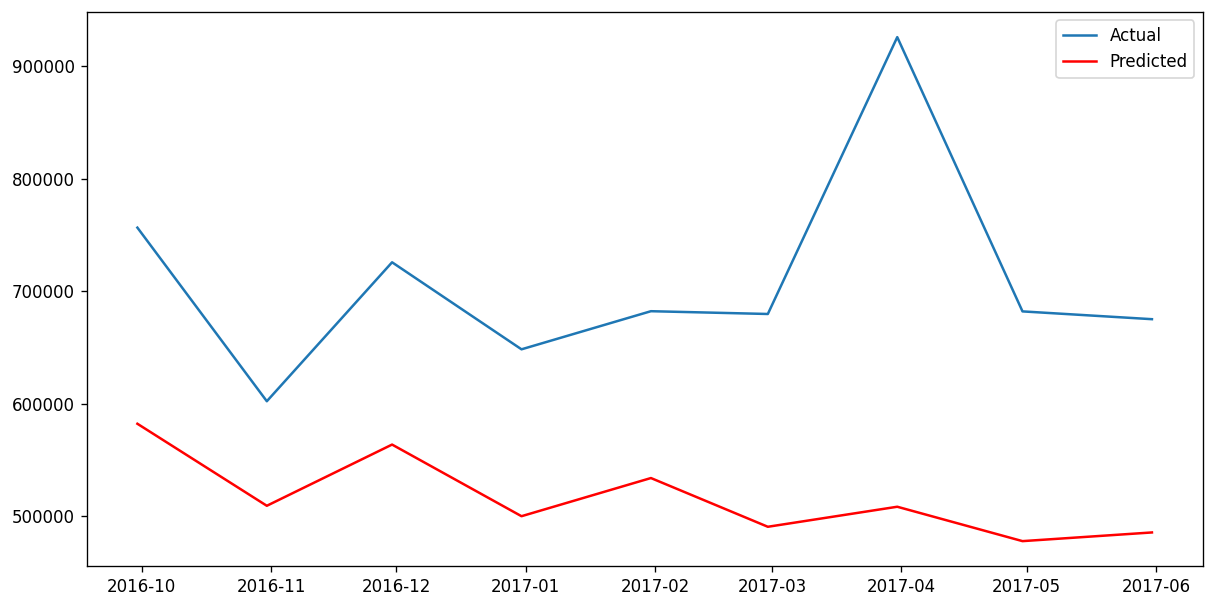

RMSE: 210125.4271328621
1       5


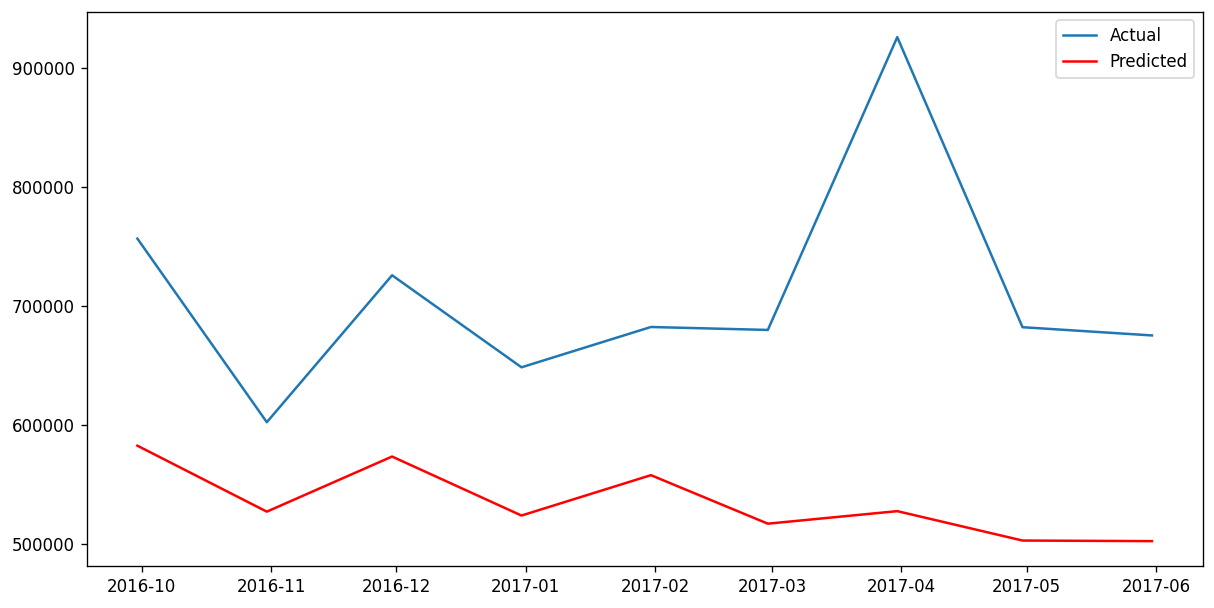

RMSE: 193741.28681693436
1       6


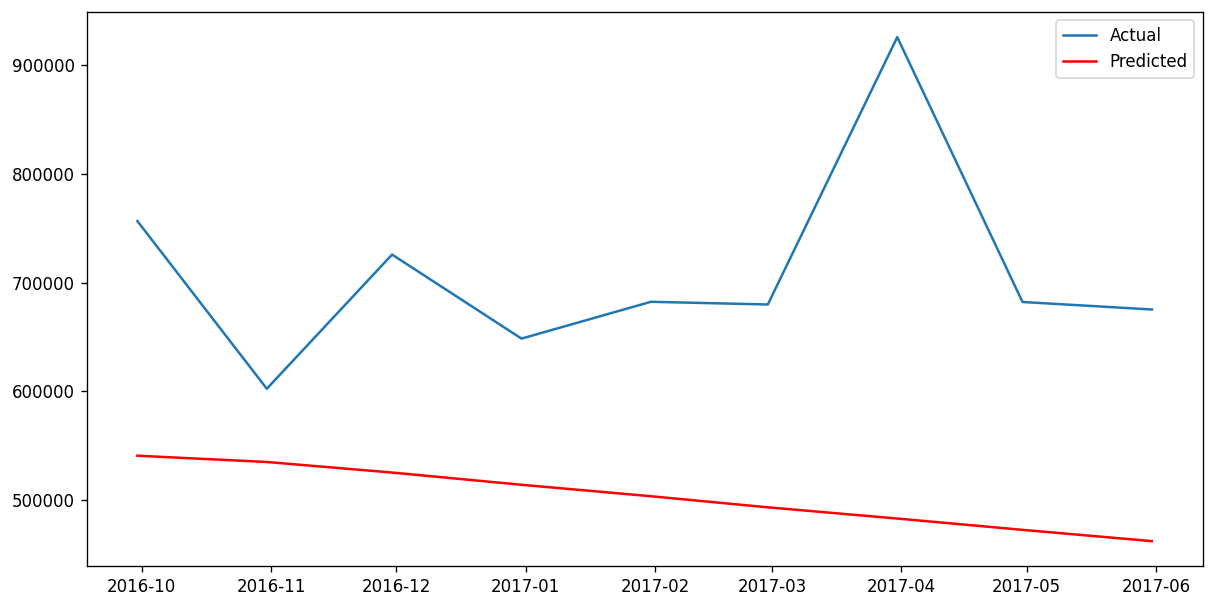

RMSE: 226758.6624763013
2       1


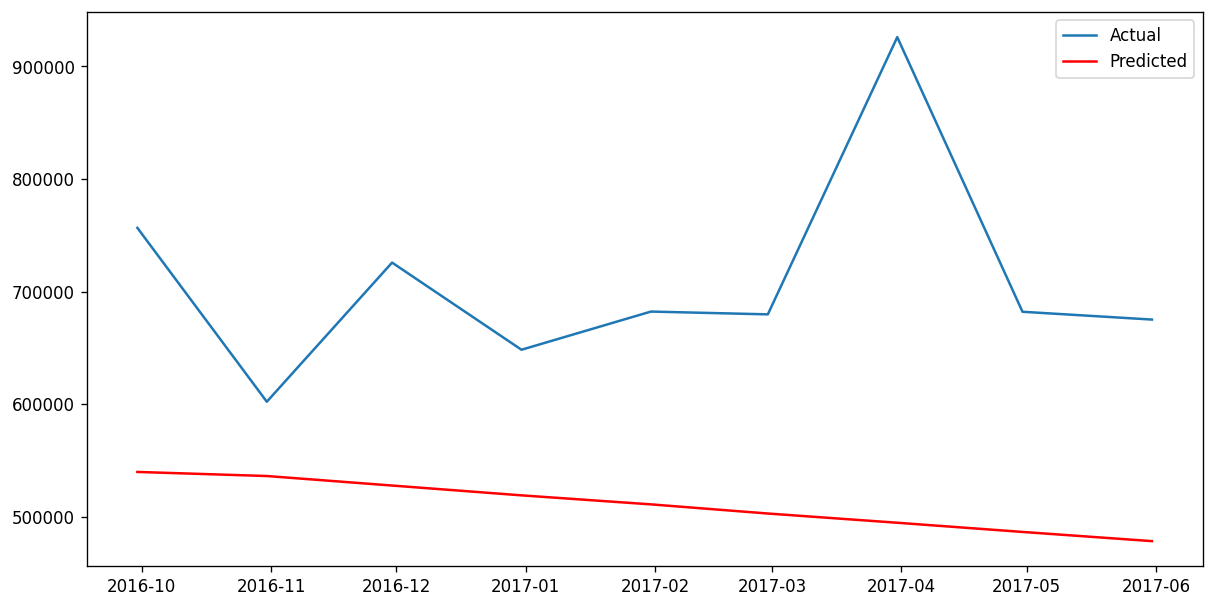

RMSE: 218808.48458457526
2       2


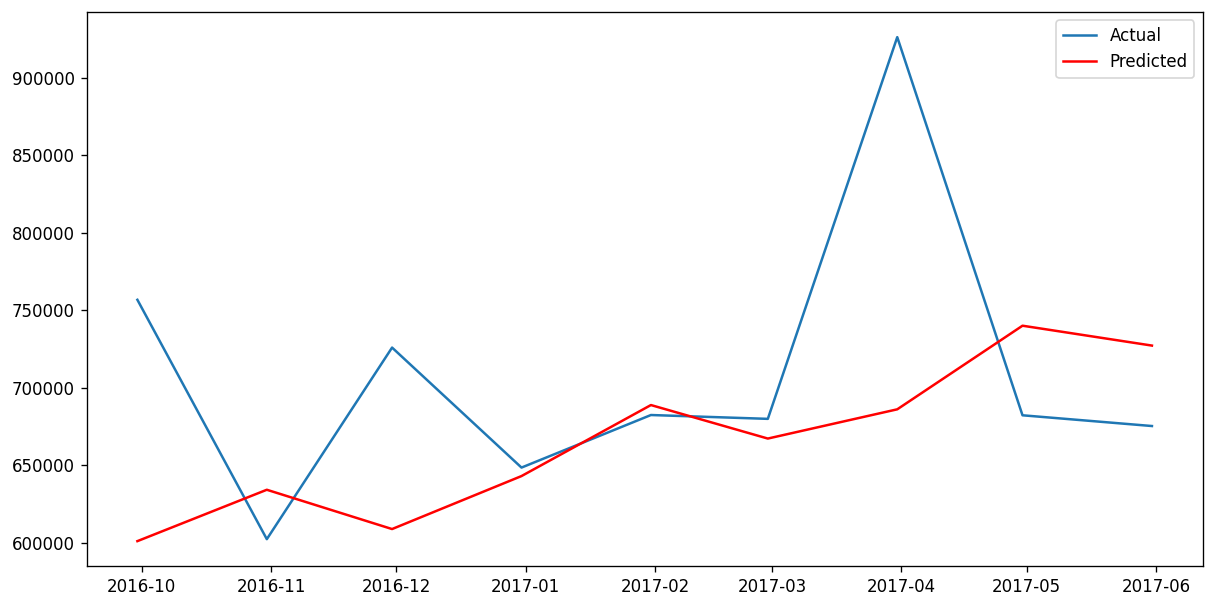

RMSE: 106900.50168585777
2       3


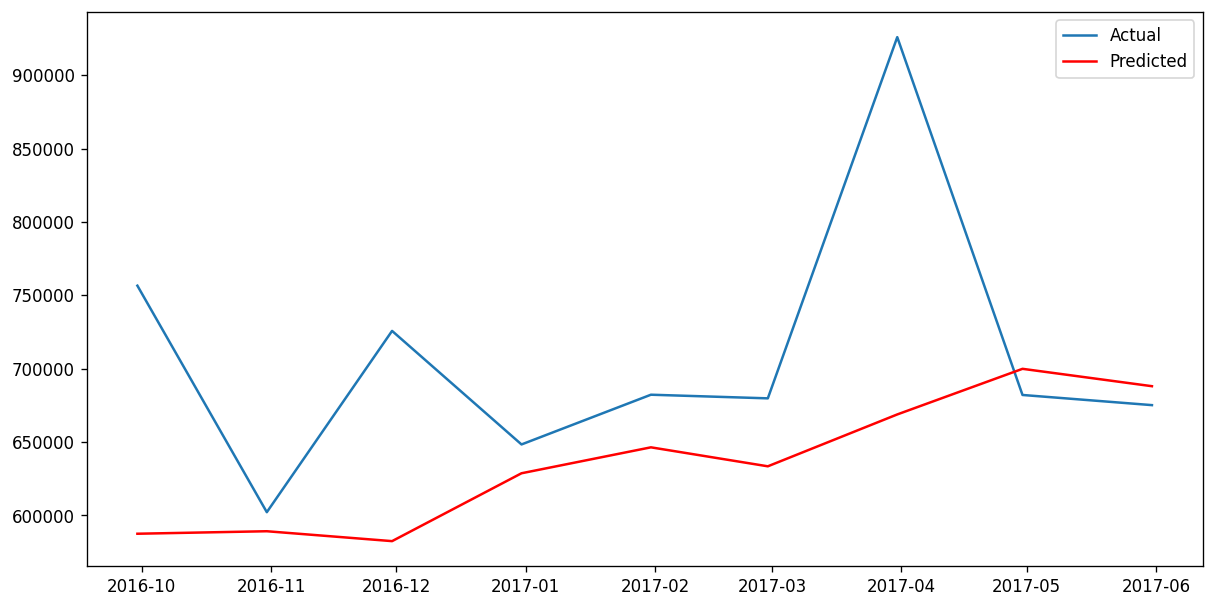

RMSE: 115348.29053143675
2       4


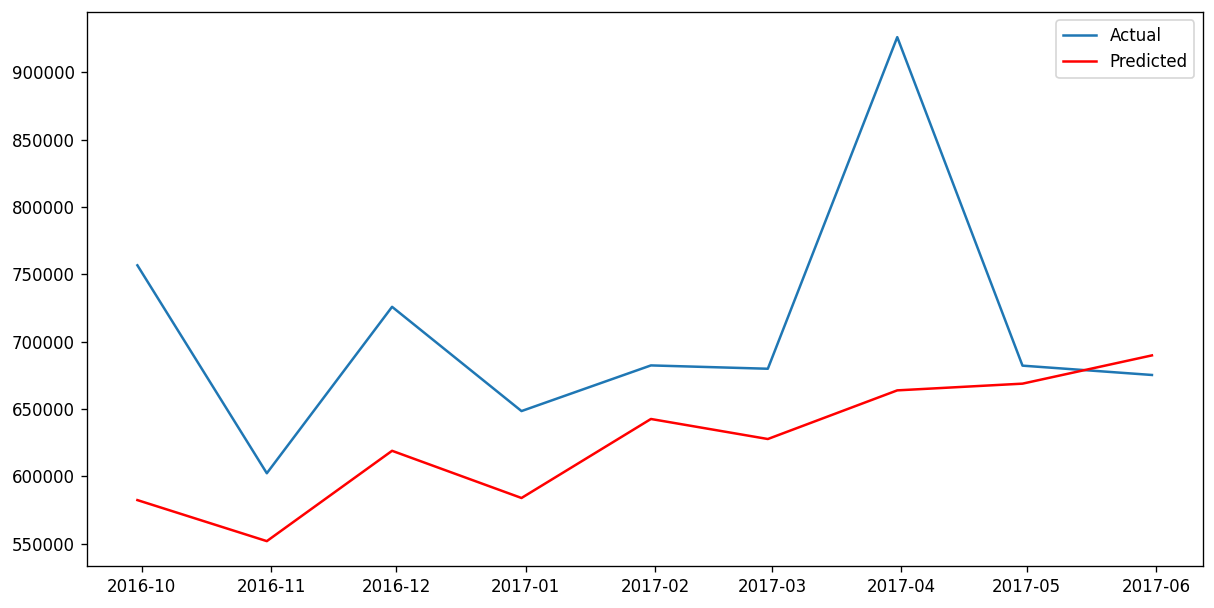

RMSE: 116432.47424310035
2       5


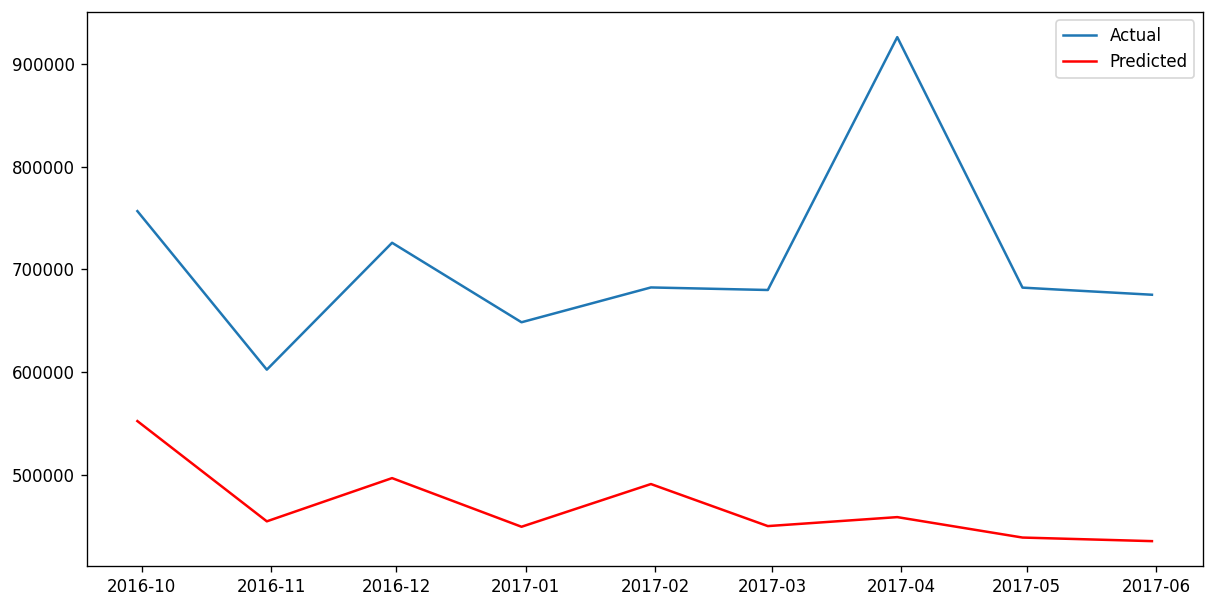

RMSE: 253980.56857991303
2       6


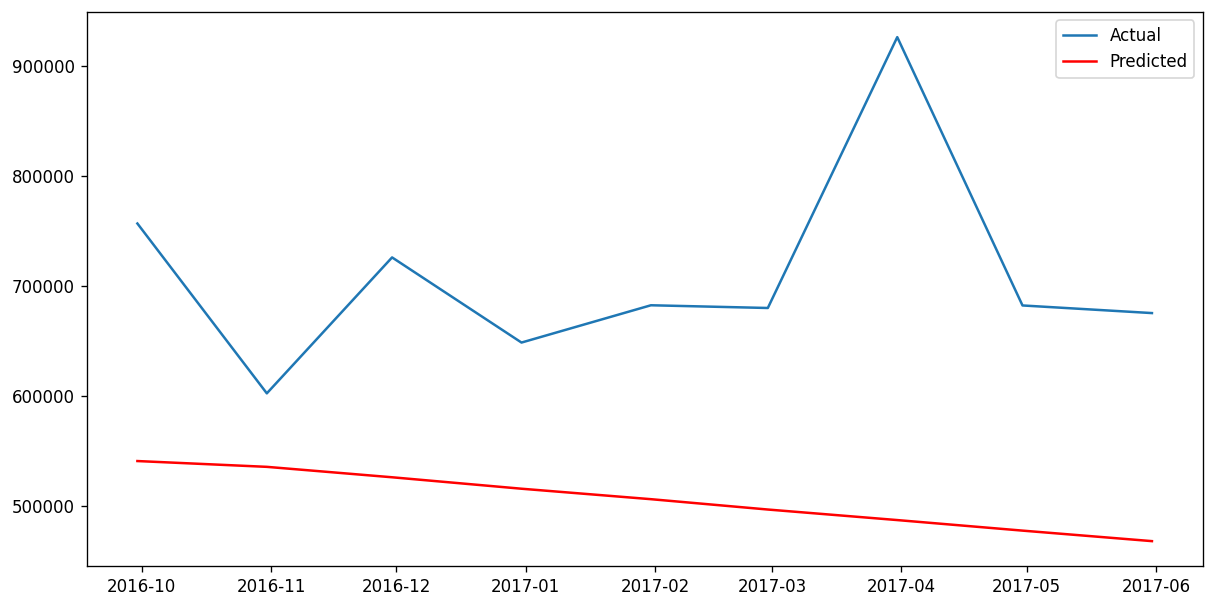

RMSE: 223845.38652062454
3       1


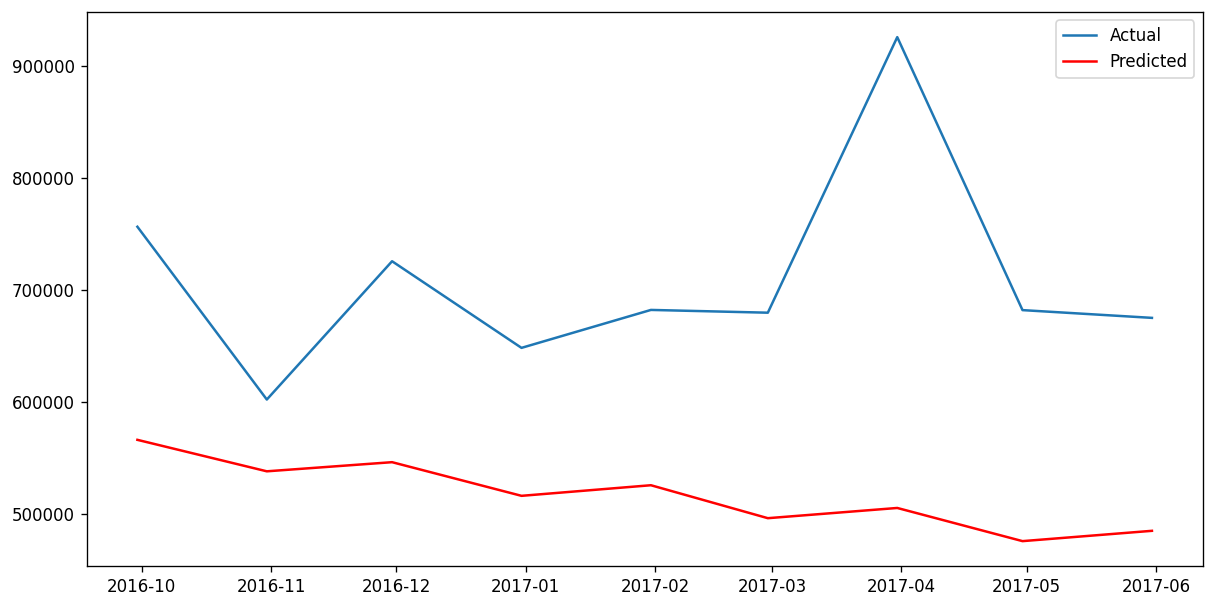

RMSE: 211909.04912147188
3       2


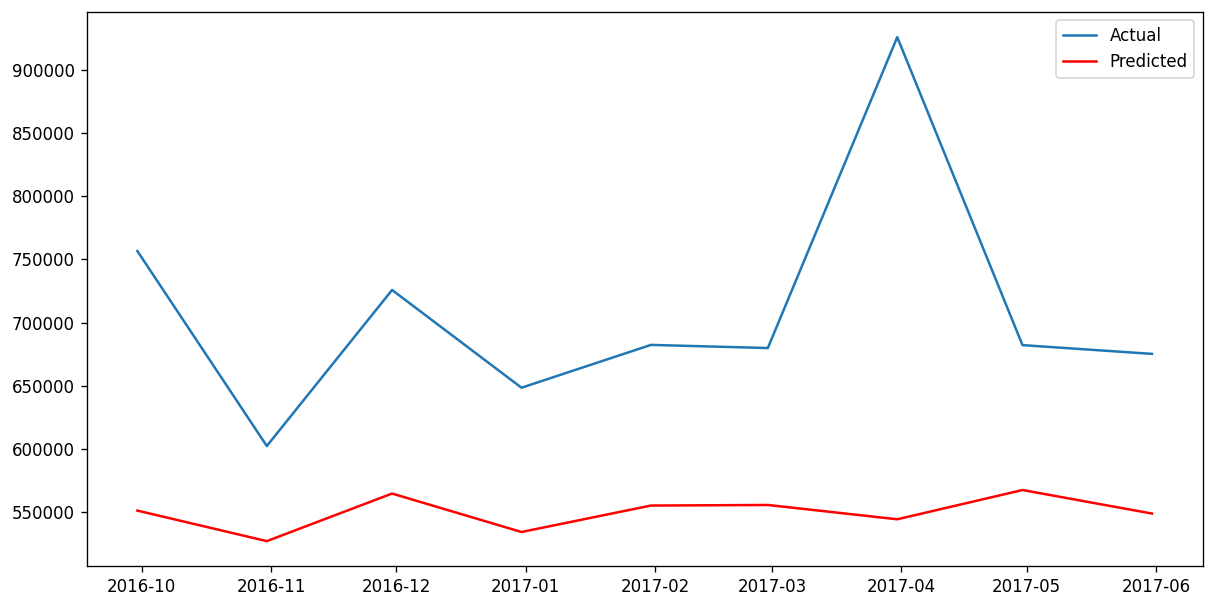

RMSE: 180613.04186191427
3       3


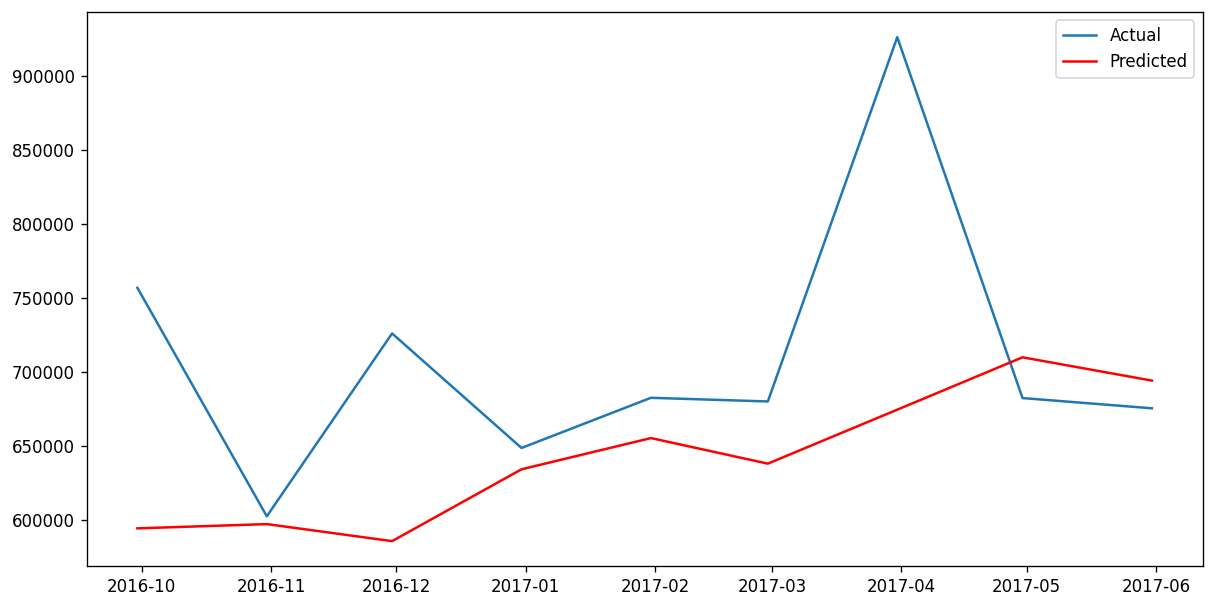

RMSE: 112235.2369210163
3       4


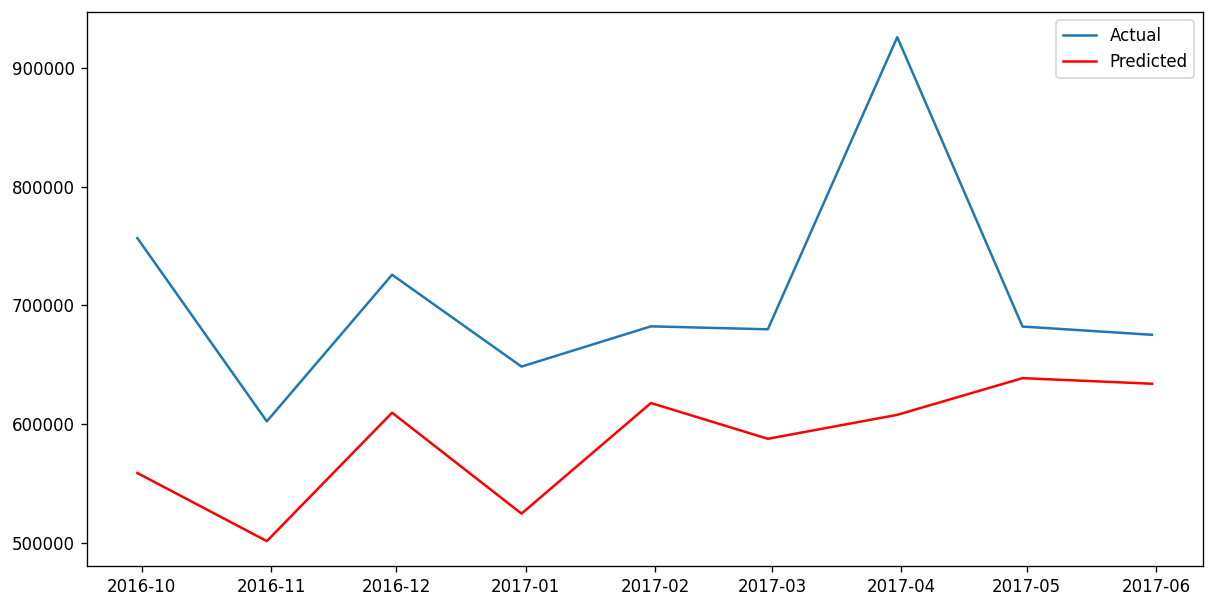

RMSE: 147519.0664097898
3       5


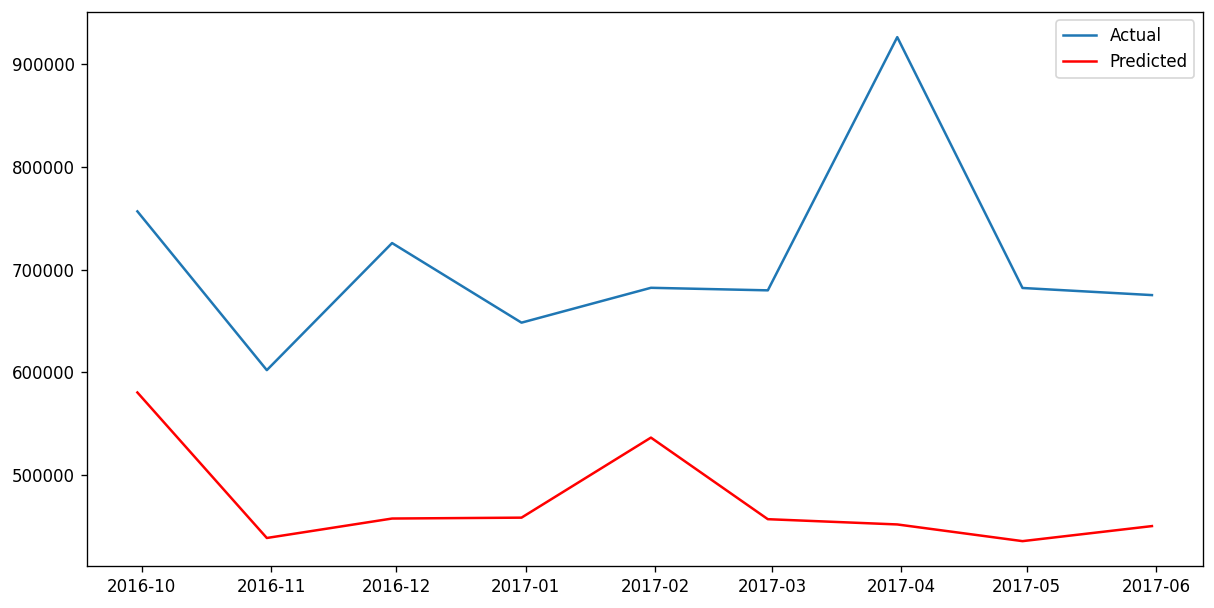

RMSE: 252038.48864947679
3       6


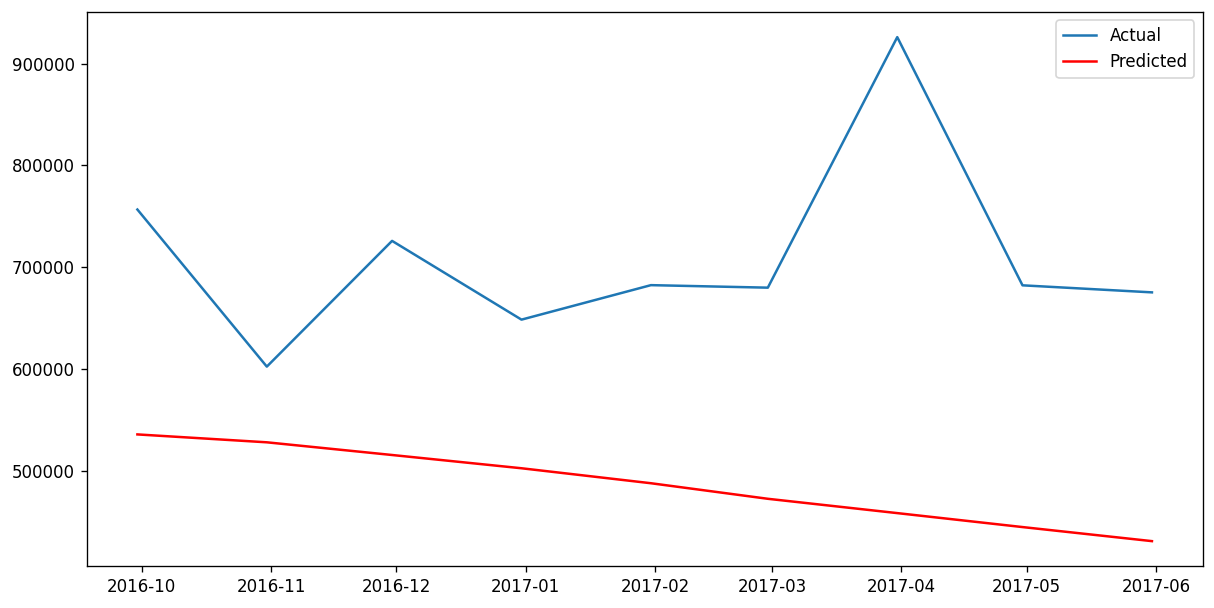

RMSE: 244044.76369524733
4       1


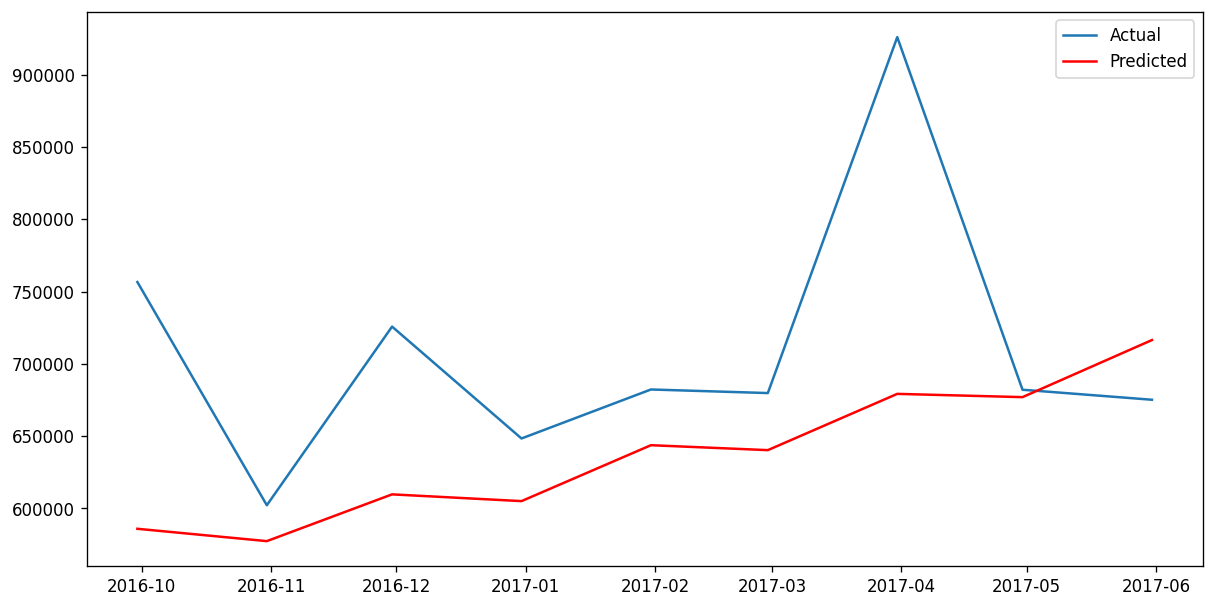

RMSE: 110944.8280194704
4       2


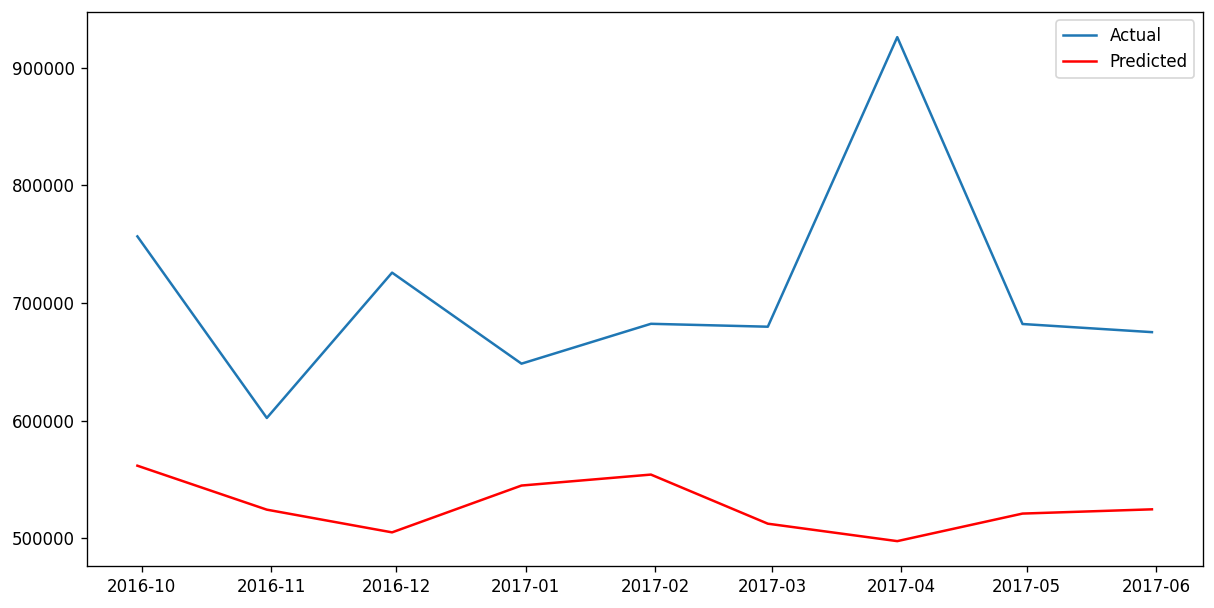

RMSE: 205599.54976926168
4       3


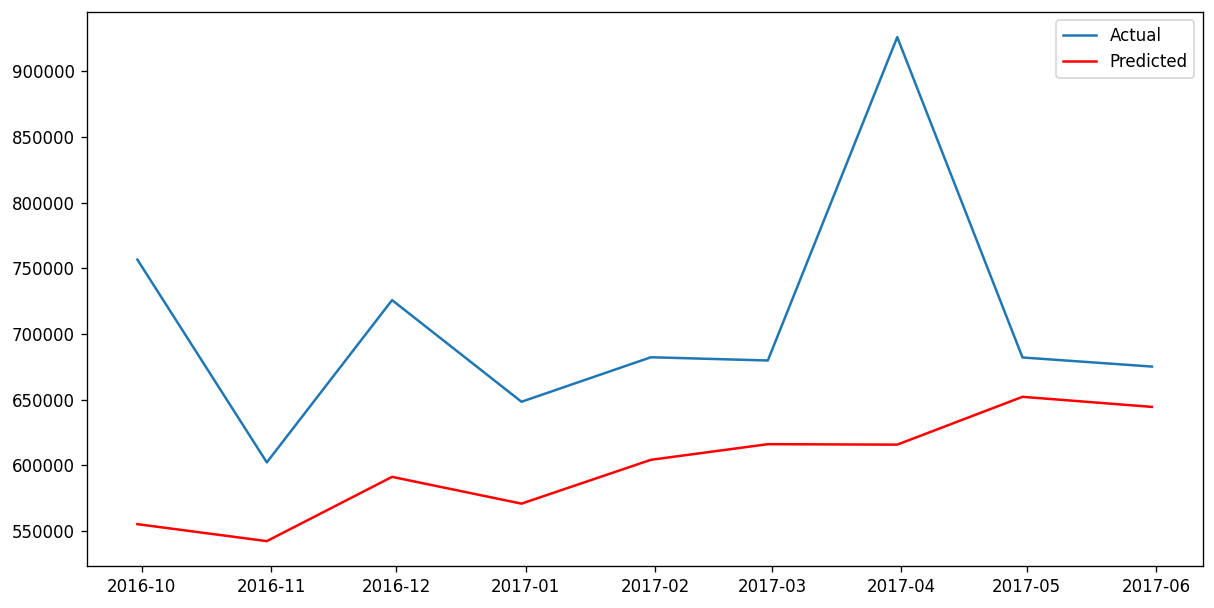

RMSE: 140070.53271401103
4       4


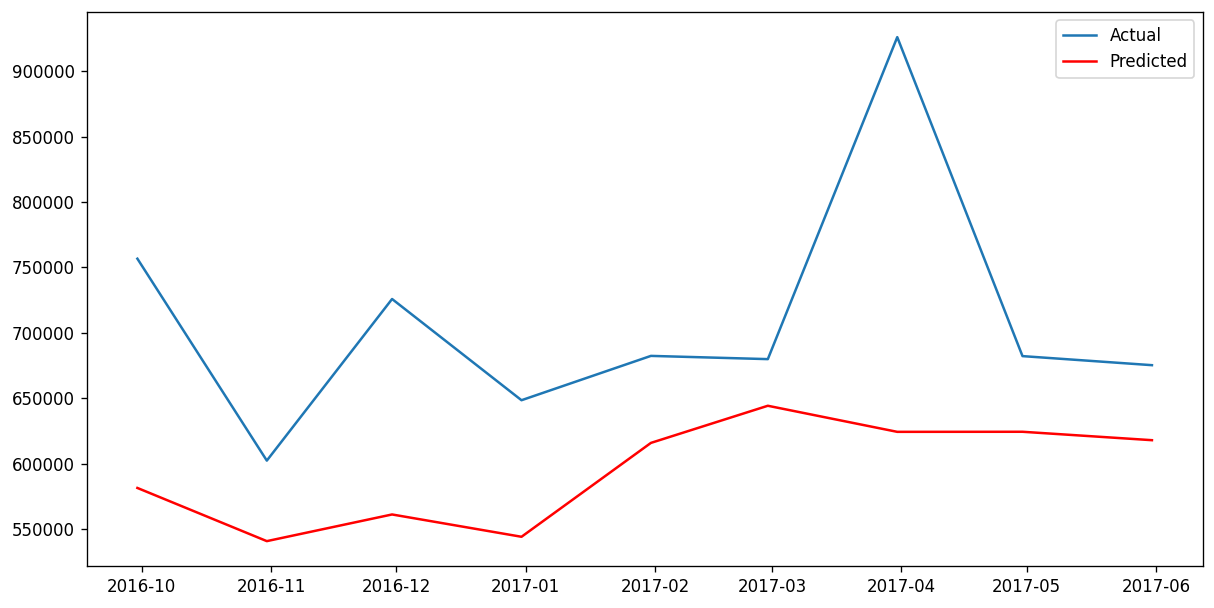

RMSE: 139847.77153005576
4       5


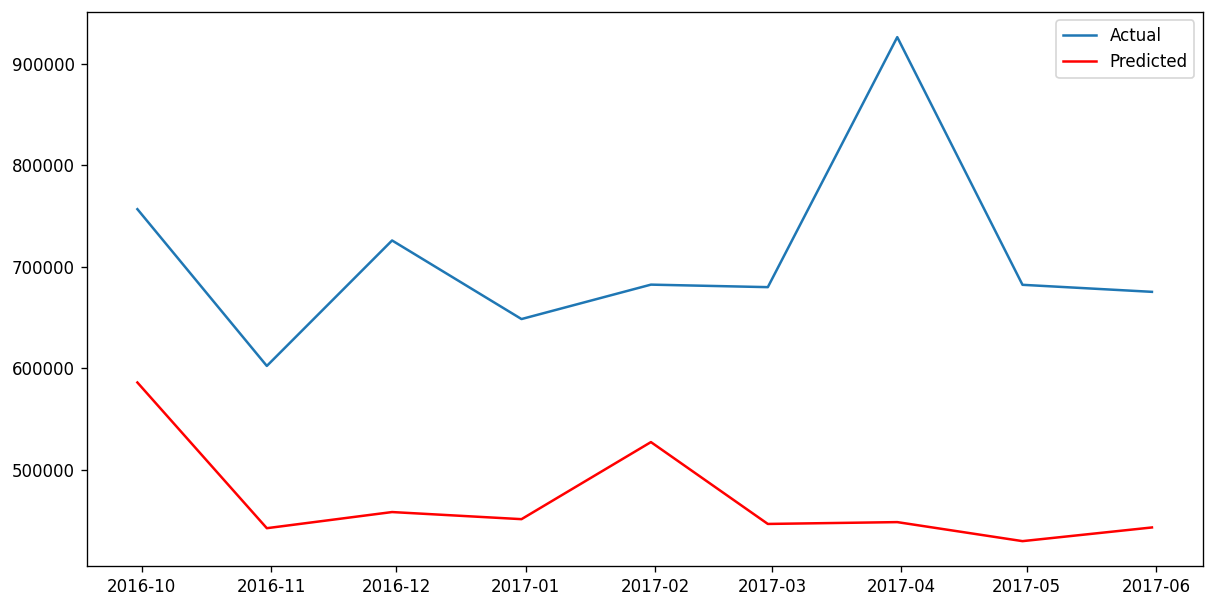

RMSE: 255863.16674000432
4       6


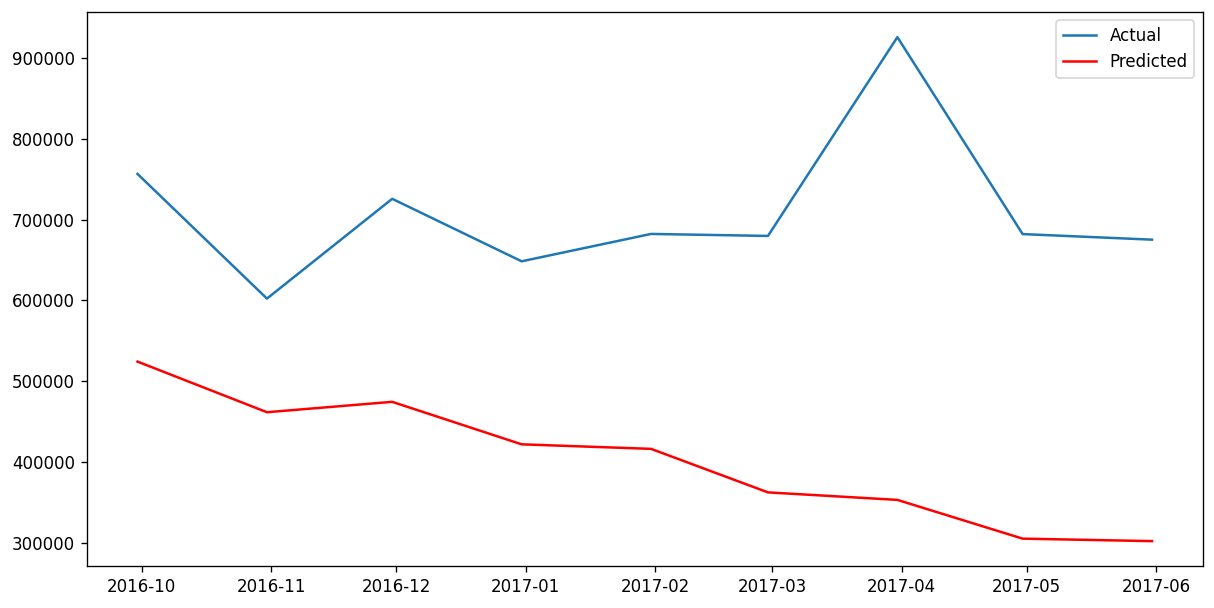

RMSE: 328370.20493596647
5       1


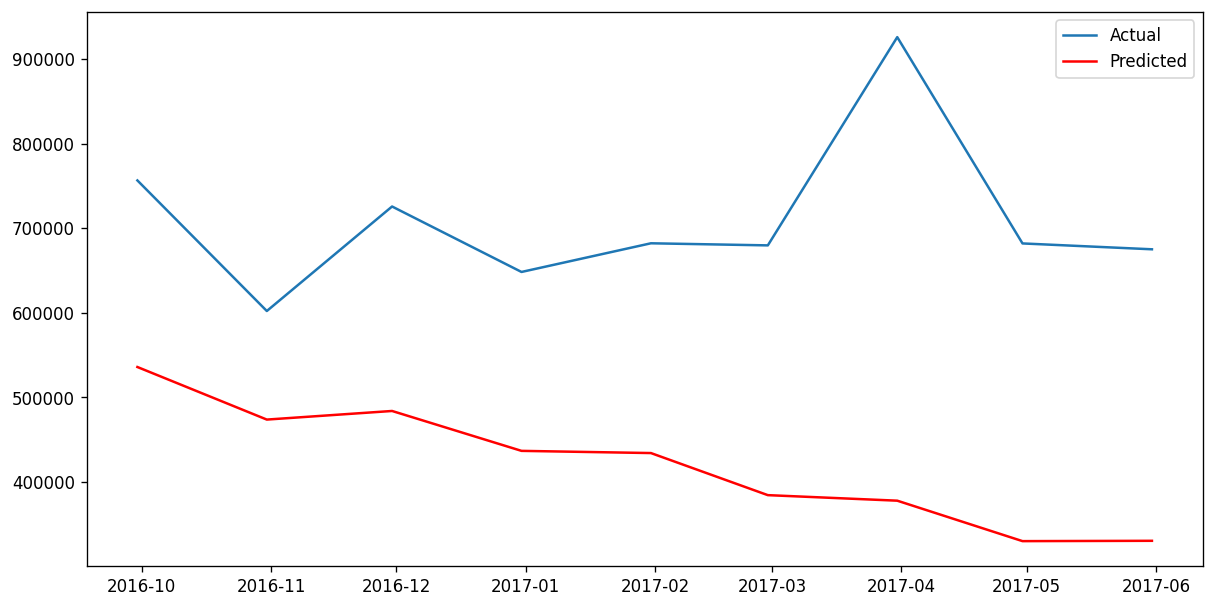

RMSE: 309151.1888698703
5       2


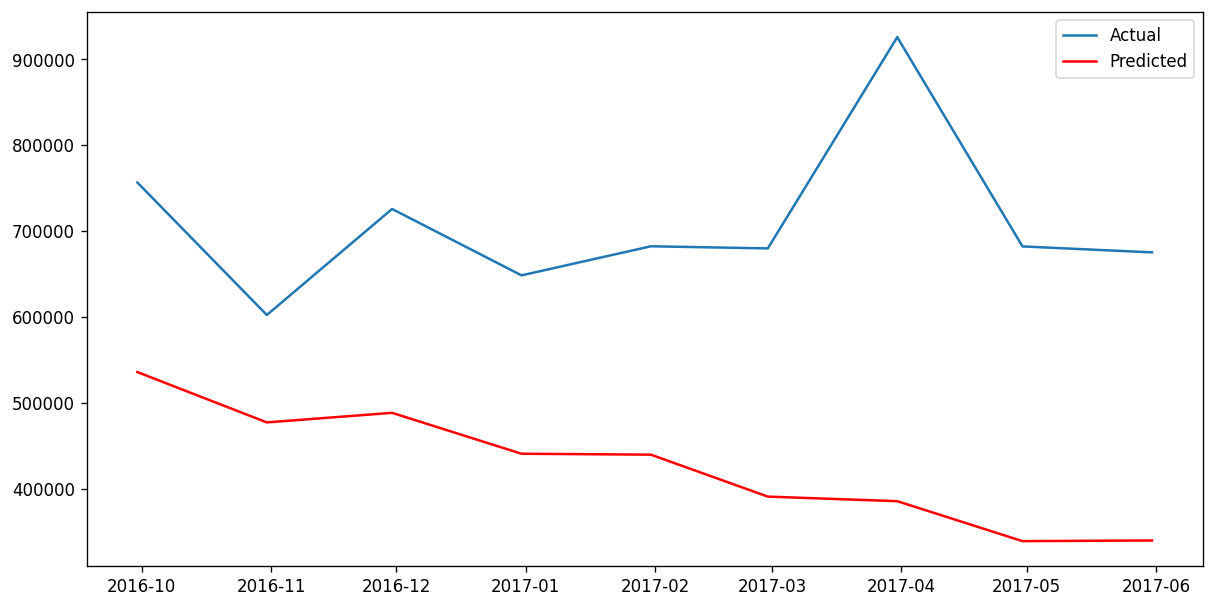

RMSE: 303679.134685578
5       3


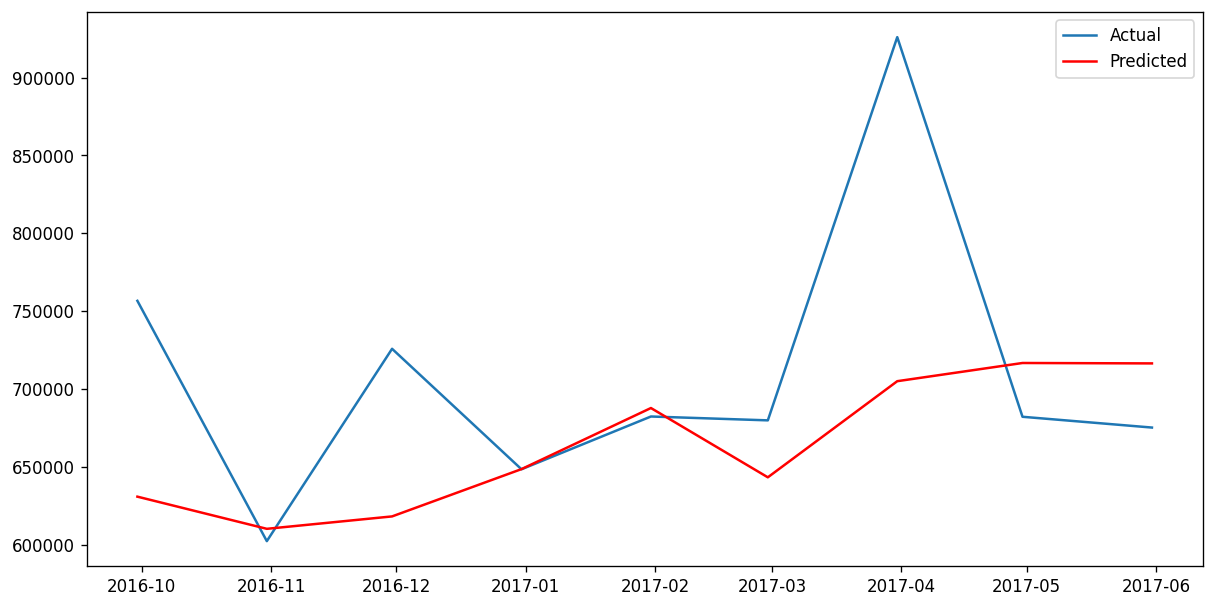

RMSE: 94645.88749342044
5       4


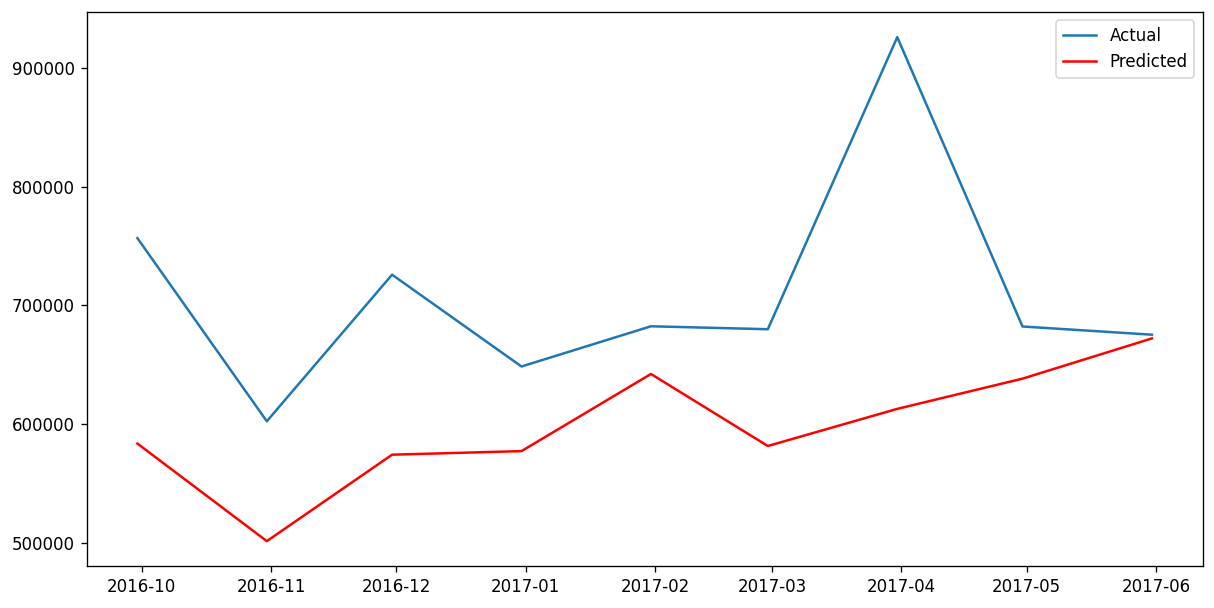

RMSE: 141326.69674563356
5       5


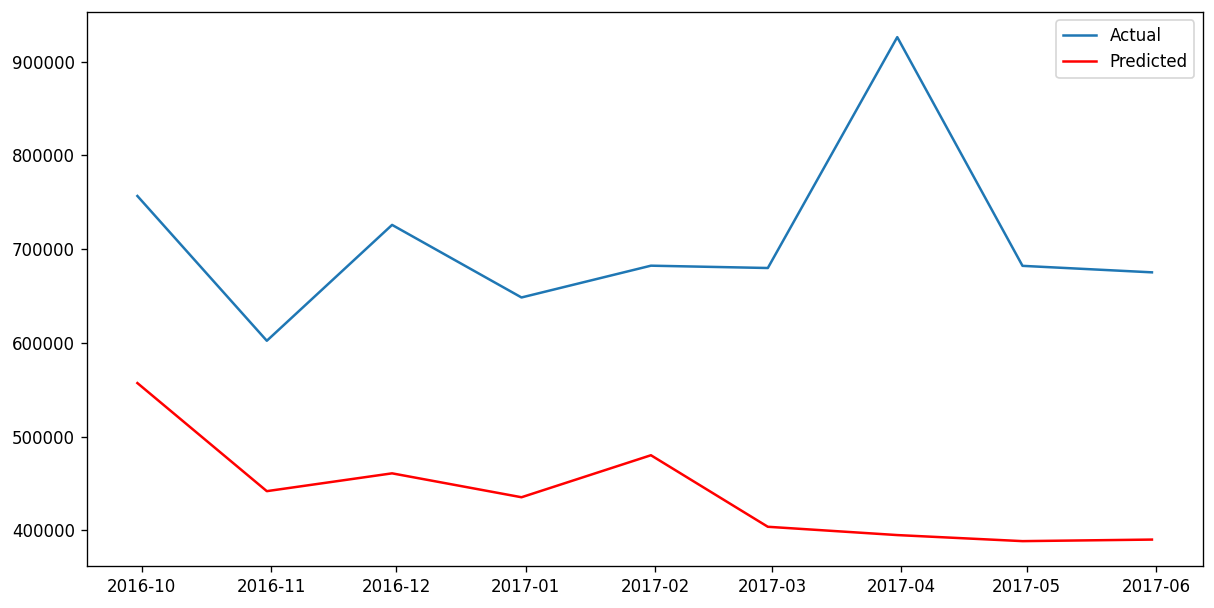

RMSE: 288218.03906105796
5       6


In [497]:
for i in range(1,6):
    for  k in range (1,7):
            model = ARIMA(train, order=(i,2,k))
            arima_model = model.fit()
            predictions = arima_model.predict(start=len(train), end=len(monthly_funded_amount)-1, typ='levels')
            from sklearn.metrics import mean_squared_error
            mse = mean_squared_error(test, predictions)
            rmse = np.sqrt(mse)
            plt.figure(figsize=(12, 6))
            plt.plot(test.index, test, label='Actual')
            plt.plot(test.index, predictions, label='Predicted', color='red')
            plt.legend()
            plt.show()
            print(f'RMSE: {rmse}')
            print(i,"     ",k)








In [505]:
model = ARIMA(monthly_funded_amount, order=(4,2,6))
arima_model = model.fit()
forecast = arima_model.predict()

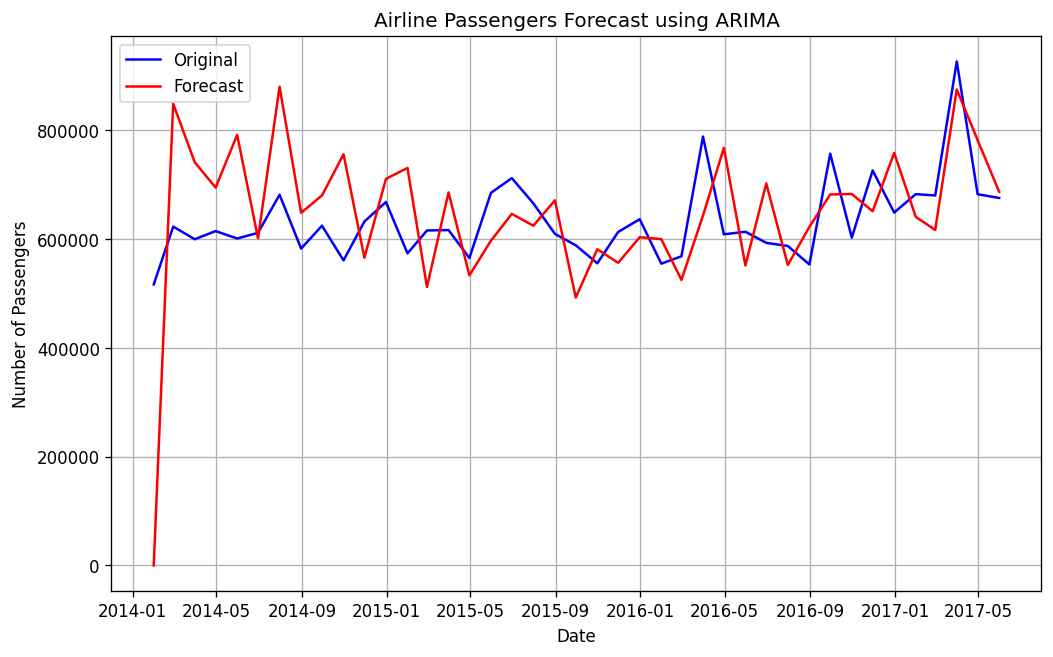

In [506]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot( monthly_funded_amount.index,monthly_funded_amount.values, label='Original', color='blue')
plt.plot( monthly_funded_amount.index,forecast, label='Forecast', color='red')
plt.title('Airline Passengers Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [513]:


monthly_funded_amount.tail()

date
2017-01-31    682300
2017-02-28    679825
2017-03-31    926050
2017-04-30    682125
2017-05-31    675200
Freq: ME, Name: funded_amount, dtype: int64

In [508]:
start_index = '2017-6-1'
end_index = '2021-12-30'

In [509]:
forecast = arima_model.predict(start=start_index, end=end_index, dynamic=False)


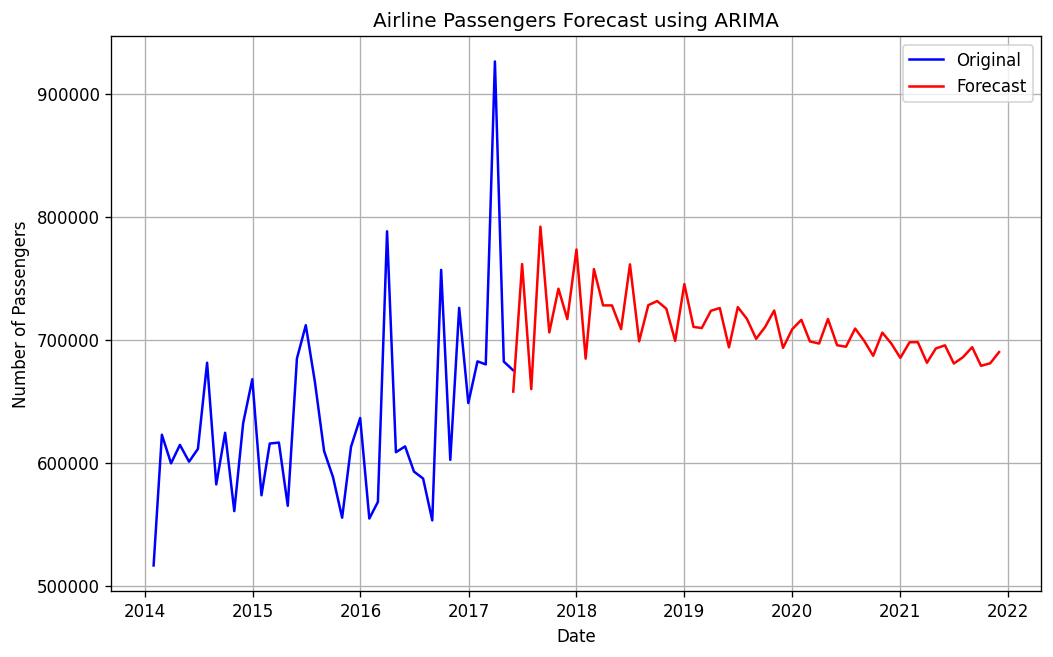

In [510]:
plt.figure(figsize=(10, 6))

plt.plot(monthly_funded_amount.index, monthly_funded_amount.values, label='Original', color='blue')
plt.plot(pd.date_range(start=monthly_funded_amount.index[-1], periods=55, freq='MS'), forecast, label='Forecast', color='red')

plt.title('Airline Passengers Forecast using ARIMA')
plt.xlabel('Date')

plt.ylabel('Number of Passengers')
plt.legend(loc='best')

plt.grid(True)
plt.show()

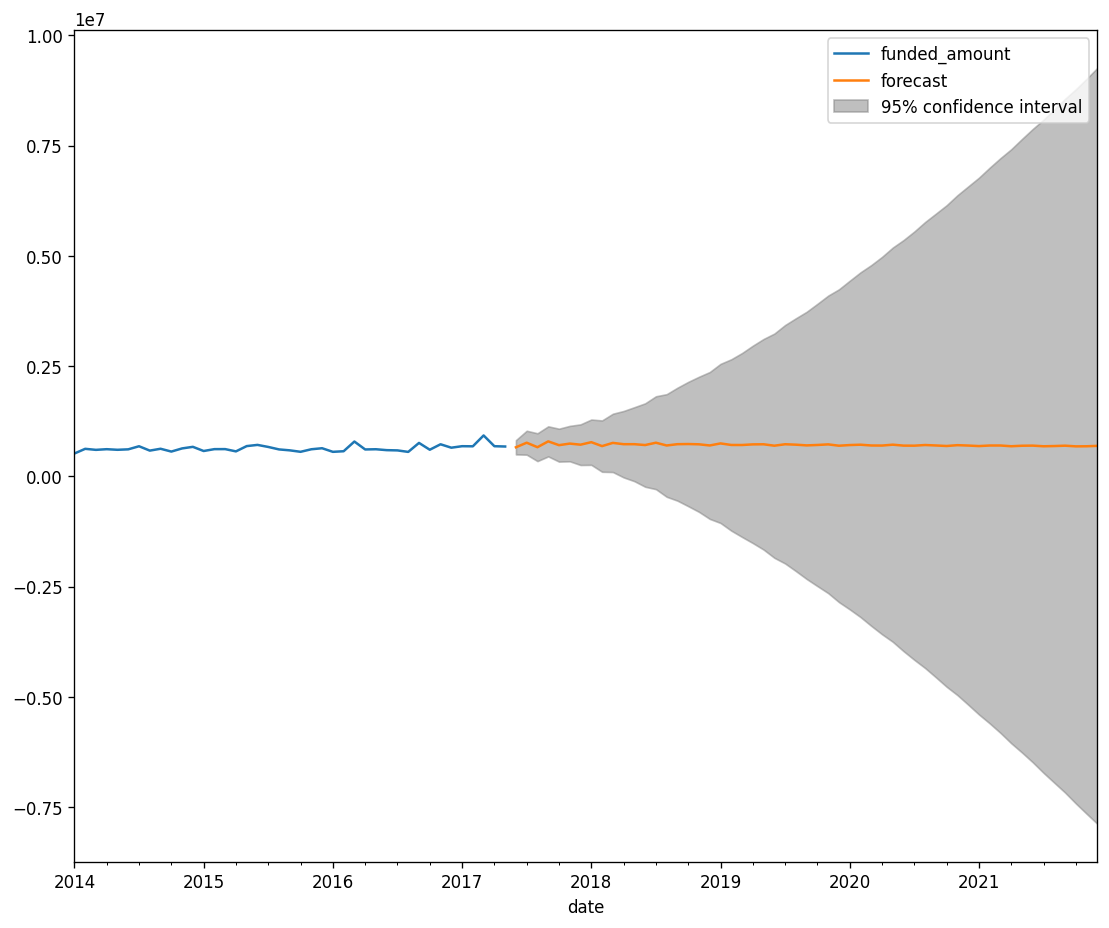

In [511]:

fig, ax = plt.subplots()
monthly_funded_amount.plot(ax=ax)

plot_predict(arima_model, start=start_index, end=end_index, ax=ax)
plt.show()